In [3]:
# 53 - 56

In [1]:
# load packages
import pandas as pd
import plotly
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [4]:
nasa = pd.read_csv('C:/Users/Worm/Downloads/New_NASA_Rebound/nasa_rebound_data_NEW5356.csv')
nasa = nasa.drop(nasa.columns[0], axis = 1)

In [5]:
nasa.tail()

Source  Chemistry  Cell  Cycle   Step Cycle_Type         Time  Voltage  \
9038   NASA        NaN  56.0  125.0  250.0  discharge  1338788.969    3.722   
9039   NASA        NaN  56.0  125.0  250.0  discharge  1338802.203    3.724   
9040   NASA        NaN  56.0  125.0  250.0  discharge  1338815.406    3.725   
9041   NASA        NaN  56.0  125.0  250.0  discharge  1338828.687    3.726   
9042   NASA        NaN  56.0  125.0  250.0  discharge  1338841.906    3.727   

      Reference Capacity  Instantaneous Capacity  Charge_Capacity  \
9038            4064.612               -4077.569              NaN   
9039            4064.612               -4077.608              NaN   
9040            4064.612               -4077.637              NaN   
9041            4064.612               -4077.639              NaN   
9042            4064.612               -4077.639              NaN   

      Discharge_Capacity  Temperature  Ambient_Temperature  Current  \
9038                 NaN       11.432                  4.0   -0.003   
9039                 NaN       11.310                  4.0   -0.004   
9040                 NaN       11.176                  4.0   -0.002   
9041                 NaN       11.037                  4.0    0.000   
9042                 NaN       10.855                  4.0   -0.001   

     Charge_Type  Step_Time  Current_Diff  
9038  Continuous    249.625           NaN  
9039  Continuous    262.859           NaN  
9040  Continuous    276.062           NaN  
9041  Continuous    289.343           NaN  
9042  Continuous    302.562           NaN

In [6]:
nasa = nasa.drop(['Source', 'Current_Diff'], axis=1)

In [7]:
nasa.columns

Index(['Chemistry', 'Cell', 'Cycle', 'Step', 'Cycle_Type', 'Time', 'Voltage',
       'Reference Capacity', 'Instantaneous Capacity', 'Charge_Capacity',
       'Discharge_Capacity', 'Temperature', 'Ambient_Temperature', 'Current',
       'Charge_Type', 'Step_Time'],
      dtype='object')

In [10]:
print(nasa[nasa['Cell'] == 54]['Step_Time'].diff())

0          NaN
1        9.625
2        9.594
3        9.843
4        9.750
         ...  
2370    13.157
2371    13.234
2372    13.203
2373    13.281
2374    13.219
Name: Step_Time, Length: 2375, dtype: float64


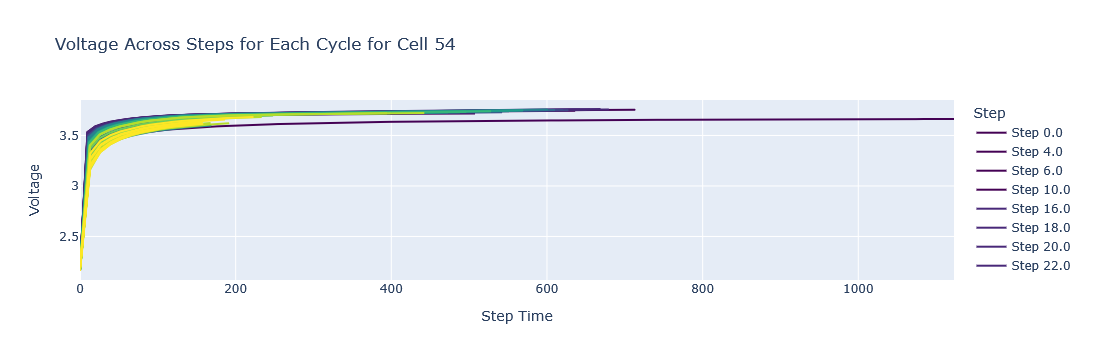

In [13]:
# Cell 53
# Normalize the step to a range from 0 to 1 for color selection
steps = nasa[nasa['Cell'] == 54]['Step'].unique()
max_step = max(steps)

# Create a figure
fig = go.Figure()

# Add a line trace for each unique step
for step in steps:
    step_data = nasa[(nasa['Cell'] == 54) & (nasa['Step'] == step)]
    
    # Select a color from the Viridis color scale based on the normalized step value
    color = px.colors.sequential.Viridis[round((step / max_step) * (len(px.colors.sequential.Viridis) - 1))]
    
    fig.add_trace(
        go.Scatter(
            x=step_data['Step_Time'],
            y=step_data['Voltage'],
            mode='lines',
            name=f'Step {step}',
            line=dict(color=color),
            hoverinfo="text+name",
        )
    )

# Customize layout
fig.update_layout(
    title="Voltage Across Steps for Each Cycle for Cell 54",
    xaxis_title="Step Time",
    yaxis_title="Voltage",
    legend_title="Step"
)

# Show the plot
fig.show()

In [14]:
df_54 = nasa[nasa['Cell'] == 54]

In [55]:
df_54['Step'].nunique()

100

In [15]:
df_54.tail()

Chemistry  Cell  Cycle   Step Cycle_Type         Time  Voltage  \
2370        NaN  54.0  125.0  250.0  discharge  1338788.969    3.571   
2371        NaN  54.0  125.0  250.0  discharge  1338802.203    3.586   
2372        NaN  54.0  125.0  250.0  discharge  1338815.406    3.598   
2373        NaN  54.0  125.0  250.0  discharge  1338828.687    3.608   
2374        NaN  54.0  125.0  250.0  discharge  1338841.906    3.617   

      Reference Capacity  Instantaneous Capacity  Charge_Capacity  \
2370            4390.322               -4403.702              NaN   
2371            4390.322               -4403.720              NaN   
2372            4390.322               -4403.726              NaN   
2373            4390.322               -4403.727              NaN   
2374            4390.322               -4403.716              NaN   

      Discharge_Capacity  Temperature  Ambient_Temperature  Current  \
2370                 NaN       21.859                  4.0   -0.002   
2371                 NaN       21.499                  4.0   -0.002   
2372                 NaN       20.952                  4.0    0.000   
2373                 NaN       20.610                  4.0   -0.001   
2374                 NaN       20.185                  4.0    0.002   

     Charge_Type  Step_Time  
2370  Continuous    105.563  
2371  Continuous    118.797  
2372  Continuous    132.000  
2373  Continuous    145.281  
2374  Continuous    158.500

In [16]:
# Example target function: (a * x ^ b)
def target_function(x, a, b):
    return a * x**b

# Get unique steps
unique_steps = df_54['Step'].unique()
# unique_steps = [2., 4., 6., 8., 10.]


# Storage for fitted parameters
fitted_parameters = []

# Iterate over each unique step
for step in unique_steps:
    step_data = df_54[df_54['Step'] == step].sort_values(by='Step_Time')
    x = step_data['Step_Time'].values
    y = step_data['Voltage'].values
    
    # Fit the curve
    try:
        params, _ = curve_fit(target_function, x, y, bounds=([0, 0], [np.inf, np.inf]))
        fitted_parameters.append((step, params[0], params[1]))
        
        # # Plot original data and fitted curve
        # plt.figure()
        # plt.scatter(x, y, label='Original Data', color='blue')
        # plt.plot(x, target_function(x, *params), label=f'Fitted: a={params[0]:.2f}, b={params[1]:.2f}', color='red')
        # plt.title(f'Step {step}')
        # plt.xlabel('Step Time')
        # plt.ylabel('Voltage')
        # plt.legend()
        # plt.show()
        
    except RuntimeError:
        print(f"Fit could not be found for Step {step}")

# Convert fitted parameters to a dataframe for further analysis
fitted_df = pd.DataFrame(fitted_parameters, columns=['Step', 'a', 'b'])
print(fitted_df)

     Step         a         b
0     0.0  3.294535  0.015805
1     4.0  3.434559  0.013389
2     6.0  3.479995  0.011696
3    10.0  3.490824  0.011420
4    16.0  3.456138  0.013184
..    ...       ...       ...
95  240.0  3.081124  0.033996
96  242.0  2.870902  0.047194
97  244.0  2.950006  0.042468
98  248.0  2.990514  0.039643
99  250.0  2.829452  0.049751

[100 rows x 3 columns]


In [17]:
# Add a new column in fitted_df to store the MSE for each step
mse_list = []
r2_list = []

for step, a, b in fitted_df[['Step', 'a', 'b']].values:
    # Filter the data for the current step
    step_data = df_54[df_54['Step'] == step].sort_values(by='Step_Time')
    x = step_data['Step_Time'].values
    y_observed = step_data['Voltage'].values
    
    # Predict using the fitted parameters
    y_predicted = target_function(x, a, b)

    # Calculate R^2 score
    r2 = r2_score(y_observed, y_predicted)
    r2_list.append(r2)
    
    # Calculate MSE
    mse = np.mean((y_observed - y_predicted) ** 2)
    mse_list.append(mse)

# Add MSE to the fitted_df
fitted_df['MSE'] = mse_list
fitted_df['R2'] = r2_list

# Calculate the overall MSE across all steps
overall_mse = np.mean(mse_list)
average_r2 = np.mean(r2_list)

# Display results
print(fitted_df)
print(f"Overall MSE across all steps: {overall_mse:.4f}")
print(f"Average R^2 across all steps: {average_r2:.4f}")

     Step         a         b       MSE        R2
0     0.0  3.294535  0.015805  0.041166 -0.975889
1     4.0  3.434559  0.013389  0.090209 -1.063615
2     6.0  3.479995  0.011696  0.072825 -1.019094
3    10.0  3.490824  0.011420  0.064823 -0.911805
4    16.0  3.456138  0.013184  0.109580 -1.108206
..    ...       ...       ...       ...       ...
95  240.0  3.081124  0.033996  0.266188 -1.363431
96  242.0  2.870902  0.047194  0.370206 -1.719188
97  244.0  2.950006  0.042468  0.371817 -1.702190
98  248.0  2.990514  0.039643  0.322009 -1.557132
99  250.0  2.829452  0.049751  0.359182 -1.538813

[100 rows x 5 columns]
Overall MSE across all steps: 0.3437
Average R^2 across all steps: -1.6004


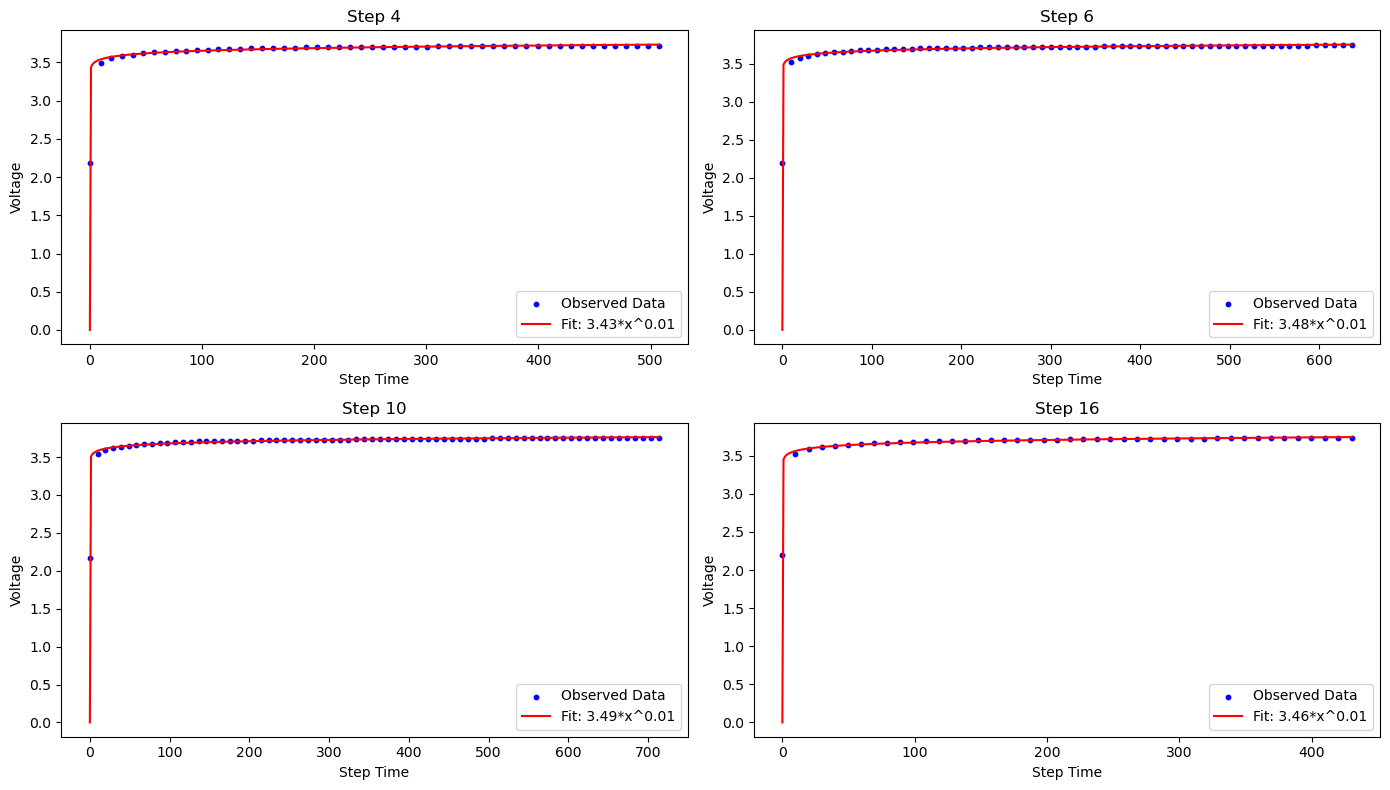

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Define the target function
def target_function(x, a, b):
    return a * x**b

# Plot the observed data and fitted function for each unique step
# unique_steps = df['Step'].unique()
unique_steps = [4, 6, 10, 16]

num_steps = 4

# Set up a grid of subplots
fig, axes = plt.subplots(nrows=num_steps // 2 + num_steps % 2, ncols=2, figsize=(14, num_steps * 2))
axes = axes.flatten()  # Flatten in case the grid has extra dimensions

for idx, step in enumerate(unique_steps):
    ax = axes[idx]
    step_data = df_54[df_54['Step'] == step].sort_values(by='Step_Time')
    x = step_data['Step_Time'].values
    y_observed = step_data['Voltage'].values
    
    # Retrieve fitted parameters for this step
    a, b = fitted_df[fitted_df['Step'] == step][['a', 'b']].iloc[0]

    # Generate predicted values
    x_fine = np.linspace(x.min(), x.max(), 500)  # Fine-grained x for a smooth curve
    y_predicted = target_function(x_fine, a, b)

    # Plot observed data and fitted curve
    ax.scatter(x, y_observed, color='blue', label='Observed Data', s=10)
    ax.plot(x_fine, y_predicted, color='red', label=f'Fit: {a:.2f}*x^{b:.2f}')
    ax.set_title(f'Step {step}')
    ax.set_xlabel('Step Time')
    ax.set_ylabel('Voltage')
    ax.legend()

# Remove extra axes if any
for ax in axes[len(unique_steps):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [20]:
# Example target function: a * x^b + c
def target_function(x, a, b, c):
    return a * x**b + c

# Dataframe and fitting process (example)
fitted_parameters = []

# Iterate over each unique step
for step in df_54['Step'].unique():
    step_data = df_54[df_54['Step'] == step].sort_values(by='Step_Time')
    x = step_data['Step_Time'].values
    y = step_data['Voltage'].values

    # Fit the curve
    try:
        params, _ = curve_fit(target_function, x, y, bounds=([0, 0, -np.inf], [np.inf, np.inf, np.inf]))
        fitted_parameters.append((step, params[0], params[1], params[2]))  # Store a, b, c

    except RuntimeError:
        print(f"Fit could not be found for Step {step}")

# Convert fitted parameters to a DataFrame
fitted_df = pd.DataFrame(fitted_parameters, columns=['Step', 'a', 'b', 'c'])
print(fitted_df)

     Step         a         b         c
0     0.0  1.135956  0.039911  2.178334
1     4.0  1.260725  0.033053  2.184658
2     6.0  1.298176  0.028706  2.190713
3    10.0  1.325657  0.027614  2.173720
4    16.0  1.271130  0.032640  2.194795
..    ...       ...       ...       ...
95  240.0  0.943556  0.087877  2.187263
96  242.0  0.762700  0.127859  2.191938
97  244.0  0.821387  0.114020  2.197298
98  248.0  0.857831  0.105028  2.196195
99  250.0  0.760098  0.132222  2.158807

[100 rows x 4 columns]


In [21]:
mse_list = []
r2_list = []

for step, a, b, c in fitted_df[['Step', 'a', 'b', 'c']].values:
    step_data = df_54[df_54['Step'] == step].sort_values(by='Step_Time')
    x = step_data['Step_Time'].values
    y_observed = step_data['Voltage'].values
    y_predicted = target_function(x, a, b, c)

    # Calculate R^2 score
    r2 = r2_score(y_observed, y_predicted)
    r2_list.append(r2)
    
    mse = np.mean((y_observed - y_predicted) ** 2)
    mse_list.append(mse)

fitted_df['MSE'] = mse_list
overall_mse = np.mean(mse_list)

fitted_df['R2'] = r2_list
average_r2 = np.mean(r2_list)

print(f"Overall MSE across all steps: {overall_mse:.4f}")
print(f"Average R^2 across all steps: {average_r2:.4f}")

Overall MSE across all steps: 0.0002
Average R^2 across all steps: 0.9975


In [22]:
# Define the target function
def target_function(x, a, b, c):
    return a * x**b + c

# Plot the observed data and fitted function for each unique step
# unique_steps = df['Step'].unique()
unique_steps = [4, 6, 10, 16]
num_steps = len(unique_steps)

# Set up a grid of subplots
fig, axes = plt.subplots(nrows=num_steps // 2 + num_steps % 2, ncols=2, figsize=(14, num_steps * 2))
axes = axes.flatten()  # Flatten in case the grid has extra dimensions

for idx, step in enumerate(unique_steps):
    ax = axes[idx]
    step_data = df_54[df_54['Step'] == step].sort_values(by='Step_Time')
    x = step_data['Step_Time'].values
    y_observed = step_data['Voltage'].values
    
    # Retrieve fitted parameters for this step
    a, b, c = fitted_df[fitted_df['Step'] == step][['a', 'b', 'c']].iloc[0]

    # Generate predicted values
    x_fine = np.linspace(x.min(), x.max(), 500)  # Fine-grained x for a smooth curve
    y_predicted = target_function(x_fine, a, b, c)

    # Plot observed data and fitted curve
    ax.scatter(x, y_observed, color='blue', label='Observed Data', s=10)
    ax.plot(x_fine, y_predicted, color='red', label=f'Fit: {a:.2f}*x^{b:.2f} + {c:.2f}')
    ax.set_title(f'Step {step}')
    ax.set_xlabel('Step Time')
    ax.set_ylabel('Voltage')
    ax.legend()

# Remove extra axes if any
for ax in axes[len(unique_steps):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [23]:
def logistic_like(x, L, A, x0, b):
    """
    Logistic-like function with four parameters.
    L: Asymptotic maximum value
    A: Scaling factor
    x0: Midpoint of the curve
    b: Growth rate
    """
    return L - A / (1 + (x / x0)**b)

# Dataframe to store fitted parameters
fitted_parameters = []

# Iterate over each unique step
for step in df_54['Step'].unique():
    step_data = df_54[df_54['Step'] == step].sort_values(by='Step_Time')
    x = step_data['Step_Time'].values
    y = step_data['Voltage'].values

    # Initial guesses and bounds
    initial_guesses = [max(y), max(y) - min(y), np.median(x), 2]  # Guesses for [L, A, x0, b]
    lower_bounds = [0, 0, 0, 0]  # Set reasonable lower bounds
    upper_bounds = [np.inf, np.inf, np.inf, np.inf]  # Set reasonable upper bounds

    # Fit the curve
    try:
        params, _ = curve_fit(
            logistic_like, x, y,
            p0=initial_guesses,
            bounds=(lower_bounds, upper_bounds)
        )
        # Append the parameters with the step number
        fitted_parameters.append((step, params[0], params[1], params[2], params[3]))

    except RuntimeError:
        print(f"Fit could not be found for Step {step}")

# Convert fitted parameters to a DataFrame
fitted_df = pd.DataFrame(fitted_parameters, columns=['Step', 'L', 'A', 'x0', 'b'])
print(fitted_df)

C:\Users\Worm\AppData\Local\Temp\ipykernel_28084\72235235.py:27: OptimizeWarning:

Covariance of the parameters could not be estimated



     Step         L         A        x0         b
0     0.0  3.742225  1.562014  0.865070  0.417875
1     4.0  3.777448  1.592413  0.360733  0.458018
2     6.0  3.797954  1.606940  0.227455  0.420940
3    10.0  3.812691  1.638690  0.179760  0.396093
4    16.0  3.801967  1.606957  0.224707  0.412924
..    ...       ...       ...       ...       ...
95  240.0  3.829774  1.641771  2.944644  0.538209
96  242.0  3.811889  1.618894  5.650286  0.609548
97  244.0  3.836467  1.638471  4.356579  0.554422
98  248.0  3.832223  1.635226  4.026228  0.557561
99  250.0  3.814336  1.654338  6.123121  0.616028

[100 rows x 5 columns]


In [24]:
# Lists to store MSE and R^2 values
mse_list = []
r2_list = []

# Iterate over each fitted step and calculate MSE and R²
for step, L, A, x0, b in fitted_df[['Step', 'L', 'A', 'x0', 'b']].values:
    step_data = df_54[df_54['Step'] == step].sort_values(by='Step_Time')
    x = step_data['Step_Time'].values
    y_observed = step_data['Voltage'].values

    # Use the logistic-like function for prediction (L - A / (1 + (x / x0) ** b))
    y_predicted = logistic_like(x, L, A, x0, b)

    # Calculate R² score
    r2 = r2_score(y_observed, y_predicted)
    r2_list.append(r2)
    
    # Calculate MSE
    mse = np.mean((y_observed - y_predicted) ** 2)
    mse_list.append(mse)

# Add MSE and R² to the fitted_df DataFrame
fitted_df['MSE'] = mse_list
overall_mse = np.mean(mse_list)

fitted_df['R2'] = r2_list
average_r2 = np.mean(r2_list)

# Print the overall MSE and average R²
print(f"Overall MSE across all steps: {overall_mse:.4f}")
print(f"Average R² across all steps: {average_r2:.4f}")

Overall MSE across all steps: 0.0000
Average R² across all steps: 1.0000


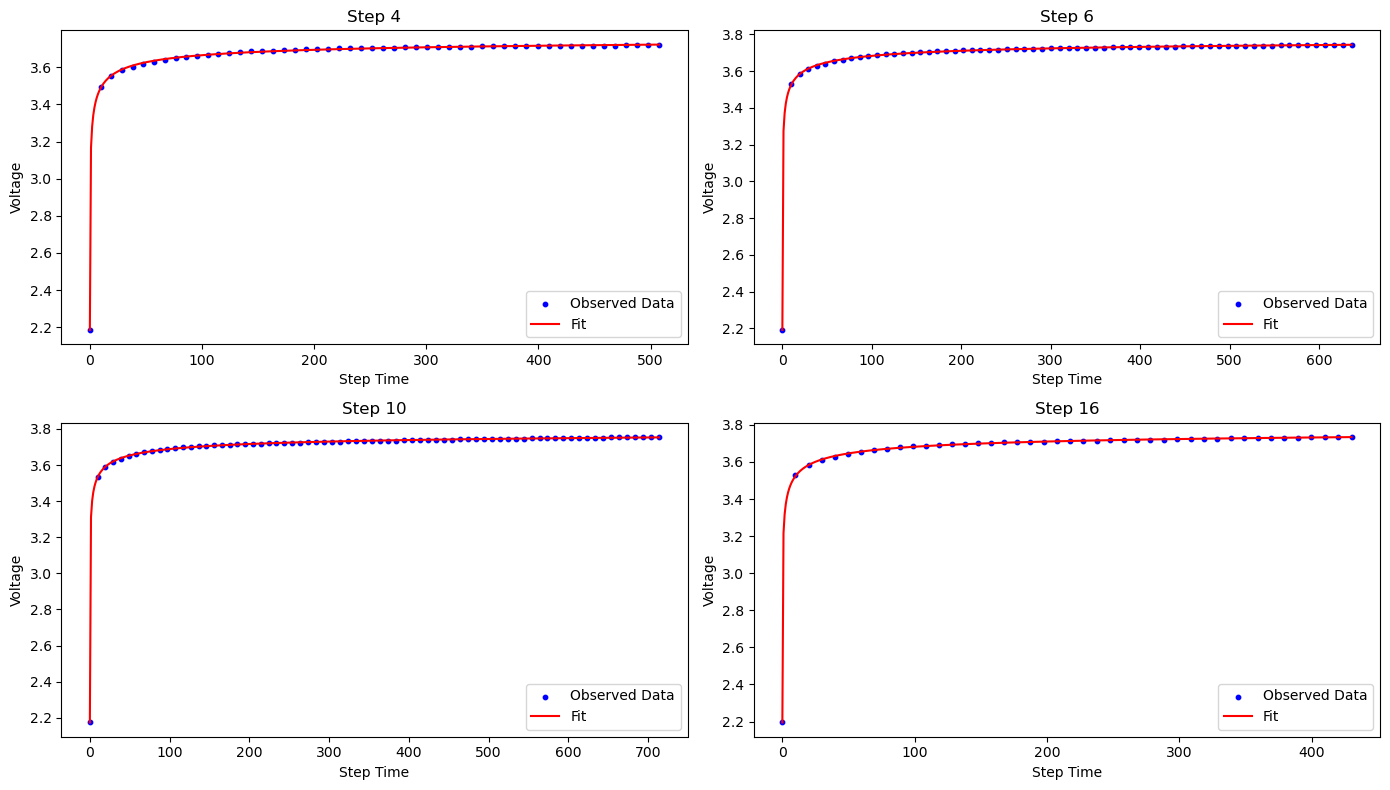

In [25]:
# Plot the observed data and fitted function for each unique step
unique_steps = [4, 6, 10, 16]

num_steps = len(unique_steps)

# Set up a grid of subplots
fig, axes = plt.subplots(nrows=num_steps // 2 + num_steps % 2, ncols=2, figsize=(14, num_steps * 2))
axes = axes.flatten()  # Flatten in case the grid has extra dimensions

for idx, step in enumerate(unique_steps):
    ax = axes[idx]
    step_data = df_54[df_54['Step'] == step].sort_values(by='Step_Time')
    x = step_data['Step_Time'].values
    y_observed = step_data['Voltage'].values
    
    # Retrieve fitted parameters for this step
    L, A, x0, b = fitted_df[fitted_df['Step'] == step][['L', 'A', 'x0', 'b']].iloc[0]

    # Generate predicted values for the fine-grained x (x_fine)
    x_fine = np.linspace(x.min(), x.max(), 500)  # Fine-grained x for a smooth curve
    y_predicted = logistic_like(x_fine, L, A, x0, b)  # Use x_fine for prediction

    # Plot observed data and fitted curve
    ax.scatter(x, y_observed, color='blue', label='Observed Data', s=10)
    ax.plot(x_fine, y_predicted, color='red', label='Fit')  # Now both x_fine and y_predicted are 500 in length
    ax.set_title(f'Step {step}')
    ax.set_xlabel('Step Time')
    ax.set_ylabel('Voltage')
    ax.legend()

# Remove extra axes if any
for ax in axes[len(unique_steps):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [28]:
# Perform a left join on 'Step' column
df_log = pd.merge(df_54, fitted_df, how='left', on='Step')
df_log.head()

Chemistry  Cell  Cycle  Step Cycle_Type      Time  Voltage  \
0        NaN  54.0    0.0   0.0  discharge  1537.344    2.180   
1        NaN  54.0    0.0   0.0  discharge  1546.969    3.337   
2        NaN  54.0    0.0   0.0  discharge  1556.563    3.412   
3        NaN  54.0    0.0   0.0  discharge  1566.406    3.446   
4        NaN  54.0    0.0   0.0  discharge  1576.156    3.470   

   Reference Capacity  Instantaneous Capacity  Charge_Capacity  ...  \
0            3061.469               -3061.477              NaN  ...   
1            3061.469               -3071.154              NaN  ...   
2            3061.469               -3071.193              NaN  ...   
3            3061.469               -3071.219              NaN  ...   
4            3061.469               -3071.224              NaN  ...   

   Ambient_Temperature  Current  Charge_Type  Step_Time         L         A  \
0                  4.0   -2.008   Continuous      0.000  3.742225  1.562014   
1                  4.0   -0.004   Continuous      9.625  3.742225  1.562014   
2                  4.0   -0.005   Continuous     19.219  3.742225  1.562014   
3                  4.0   -0.001   Continuous     29.062  3.742225  1.562014   
4                  4.0    0.000   Continuous     38.812  3.742225  1.562014   

        x0         b       MSE        R2  
0  0.86507  0.417875  0.000014  0.999339  
1  0.86507  0.417875  0.000014  0.999339  
2  0.86507  0.417875  0.000014  0.999339  
3  0.86507  0.417875  0.000014  0.999339  
4  0.86507  0.417875  0.000014  0.999339  

[5 rows x 22 columns]

In [29]:
df_log['Max_Temp'] = df_log.groupby(['Step'])['Temperature'].transform('max')

In [30]:
# Get unique Step and Rebound pairs
per_step = df_log[['Step', 'L', 'A', 'x0', 'b', 'Reference Capacity', 'Max_Temp', 'Ambient_Temperature']].drop_duplicates()
per_step.shape

(100, 8)

In [31]:
per_step.head()

Step         L         A        x0         b  Reference Capacity  \
0     0.0  3.742225  1.562014  0.865070  0.417875            3061.469   
116   4.0  3.777448  1.592413  0.360733  0.458018            4635.505   
169   6.0  3.797954  1.606940  0.227455  0.420940            4360.980   
235  10.0  3.812691  1.638690  0.179760  0.396093            4141.503   
308  16.0  3.801967  1.606957  0.224707  0.412924            4195.522   

     Max_Temp  Ambient_Temperature  
0      18.995                  4.0  
116    19.133                  4.0  
169    19.246                  4.0  
235    17.912                  4.0  
308    19.958                  4.0

In [32]:
per_step.to_csv('C:/Users/Worm/Downloads/New_NASA_Rebound/nasa54_NEW.csv', index = False)

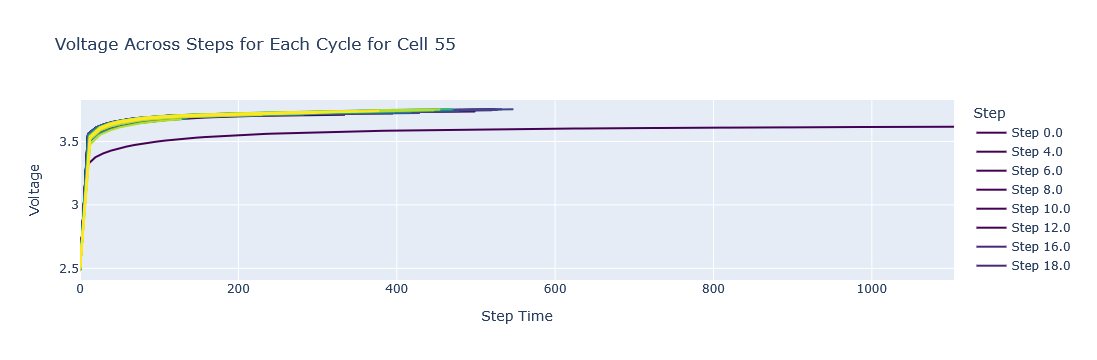

In [33]:
# Cell 55
# Normalize the step to a range from 0 to 1 for color selection
steps = nasa[nasa['Cell'] == 55]['Step'].unique()
max_step = max(steps)

# Create a figure
fig = go.Figure()

# Add a line trace for each unique step
for step in steps:
    step_data = nasa[(nasa['Cell'] == 55) & (nasa['Step'] == step)]
    
    # Select a color from the Viridis color scale based on the normalized step value
    color = px.colors.sequential.Viridis[round((step / max_step) * (len(px.colors.sequential.Viridis) - 1))]
    
    fig.add_trace(
        go.Scatter(
            x=step_data['Step_Time'],
            y=step_data['Voltage'],
            mode='lines',
            name=f'Step {step}',
            line=dict(color=color),
            hoverinfo="text+name",
        )
    )

# Customize layout
fig.update_layout(
    title="Voltage Across Steps for Each Cycle for Cell 55",
    xaxis_title="Step Time",
    yaxis_title="Voltage",
    legend_title="Step"
)

# Show the plot
fig.show()

In [34]:
df_55 = nasa[nasa['Cell'] == 55]

In [56]:
df_55['Step'].nunique()

102

In [35]:
df_55.head() 

Chemistry  Cell  Cycle  Step Cycle_Type      Time  Voltage  \
2375        NaN  55.0    0.0   0.0  discharge  1556.563    2.493   
2376        NaN  55.0    0.0   0.0  discharge  1566.406    3.321   
2377        NaN  55.0    0.0   0.0  discharge  1576.156    3.376   
2378        NaN  55.0    0.0   0.0  discharge  1585.891    3.406   
2379        NaN  55.0    0.0   0.0  discharge  1595.735    3.428   

      Reference Capacity  Instantaneous Capacity  Charge_Capacity  \
2375            3065.637               -3065.638              NaN   
2376            3065.637               -3075.415              NaN   
2377            3065.637               -3075.424              NaN   
2378            3065.637               -3075.422              NaN   
2379            3065.637               -3075.402              NaN   

      Discharge_Capacity  Temperature  Ambient_Temperature  Current  \
2375                 NaN       17.448                  4.0   -1.987   
2376                 NaN       17.448                  4.0    0.000   
2377                 NaN       17.160                  4.0   -0.002   
2378                 NaN       16.811                  4.0    0.002   
2379                 NaN       16.661                  4.0    0.001   

     Charge_Type  Step_Time  
2375  Continuous      0.000  
2376  Continuous      9.843  
2377  Continuous     19.593  
2378  Continuous     29.328  
2379  Continuous     39.172

In [36]:
df_55.tail()

Chemistry  Cell  Cycle   Step Cycle_Type         Time  Voltage  \
5903        NaN  55.0  125.0  250.0  discharge  1338788.969    3.728   
5904        NaN  55.0  125.0  250.0  discharge  1338802.203    3.729   
5905        NaN  55.0  125.0  250.0  discharge  1338815.406    3.731   
5906        NaN  55.0  125.0  250.0  discharge  1338828.687    3.732   
5907        NaN  55.0  125.0  250.0  discharge  1338841.906    3.734   

      Reference Capacity  Instantaneous Capacity  Charge_Capacity  \
5903            3975.435               -3988.709              NaN   
5904            3975.435               -3988.698              NaN   
5905            3975.435               -3988.700              NaN   
5906            3975.435               -3988.705              NaN   
5907            3975.435               -3988.711              NaN   

      Discharge_Capacity  Temperature  Ambient_Temperature  Current  \
5903                 NaN       13.405                  4.0    0.001   
5904                 NaN       13.282                  4.0    0.000   
5905                 NaN       13.059                  4.0   -0.001   
5906                 NaN       12.831                  4.0   -0.001   
5907                 NaN       12.690                  4.0   -0.001   

     Charge_Type  Step_Time  
5903  Continuous    288.532  
5904  Continuous    301.766  
5905  Continuous    314.969  
5906  Continuous    328.250  
5907  Continuous    341.469

In [37]:
df_55['Step'].nunique()

102

In [38]:
def logistic_like(x, L, A, x0, b):
    """
    Logistic-like function with four parameters.
    L: Asymptotic maximum value
    A: Scaling factor
    x0: Midpoint of the curve
    b: Growth rate
    """
    return L - A / (1 + (x / x0)**b)

# Dataframe to store fitted parameters
fitted_parameters = []

# Iterate over each unique step
for step in df_55['Step'].unique():
    step_data = df_55[df_55['Step'] == step].sort_values(by='Step_Time')
    x = step_data['Step_Time'].values
    y = step_data['Voltage'].values

    # Initial guesses and bounds
    initial_guesses = [max(y), max(y) - min(y), np.median(x), 2]  # Guesses for [L, A, x0, b]
    lower_bounds = [0, 0, 0, 0]  # Set reasonable lower bounds
    upper_bounds = [np.inf, np.inf, np.inf, np.inf]  # Set reasonable upper bounds

    # Fit the curve
    try:
        params, _ = curve_fit(
            logistic_like, x, y,
            p0=initial_guesses,
            bounds=(lower_bounds, upper_bounds)
        )
        # Append the parameters with the step number
        fitted_parameters.append((step, params[0], params[1], params[2], params[3]))

    except RuntimeError:
        print(f"Fit could not be found for Step {step}")

# Convert fitted parameters to a DataFrame
fitted_df = pd.DataFrame(fitted_parameters, columns=['Step', 'L', 'A', 'x0', 'b'])
print(fitted_df)

      Step         L         A        x0         b
0      0.0  3.703402  1.210073  1.681266  0.401375
1      4.0  3.815177  1.335154  0.461346  0.380370
2      6.0  3.782385  1.293355  0.461164  0.452043
3      8.0  3.789520  1.304499  0.422691  0.444251
4     10.0  3.782235  1.298214  0.420497  0.469532
..     ...       ...       ...       ...       ...
97   240.0  3.774002  1.279005  1.070796  0.597935
98   242.0  3.779251  1.286260  0.936595  0.565305
99   244.0  3.769088  1.275087  1.152861  0.610029
100  248.0  3.768813  1.271812  1.203898  0.621371
101  250.0  3.771154  1.275158  1.096874  0.598557

[102 rows x 5 columns]


In [39]:
# Lists to store MSE and R^2 values
mse_list = []
r2_list = []

# Iterate over each fitted step and calculate MSE and R²
for step, L, A, x0, b in fitted_df[['Step', 'L', 'A', 'x0', 'b']].values:
    step_data = df_55[df_55['Step'] == step].sort_values(by='Step_Time')
    x = step_data['Step_Time'].values
    y_observed = step_data['Voltage'].values

    # Use the logistic-like function for prediction (L - A / (1 + (x / x0) ** b))
    y_predicted = logistic_like(x, L, A, x0, b)

    # Calculate R² score
    r2 = r2_score(y_observed, y_predicted)
    r2_list.append(r2)
    
    # Calculate MSE
    mse = np.mean((y_observed - y_predicted) ** 2)
    mse_list.append(mse)

# Add MSE and R² to the fitted_df DataFrame
fitted_df['MSE'] = mse_list
overall_mse = np.mean(mse_list)

fitted_df['R2'] = r2_list
average_r2 = np.mean(r2_list)

# Print the overall MSE and average R²
print(f"Overall MSE across all steps: {overall_mse:.4f}")
print(f"Average R² across all steps: {average_r2:.4f}")

Overall MSE across all steps: 0.0000
Average R² across all steps: 0.9999


In [40]:
fitted_df.head()

Step         L         A        x0         b       MSE        R2
0   0.0  3.703402  1.210073  1.681266  0.401375  0.000012  0.999045
1   4.0  3.815177  1.335154  0.461346  0.380370  0.000008  0.999818
2   6.0  3.782385  1.293355  0.461164  0.452043  0.000009  0.999756
3   8.0  3.789520  1.304499  0.422691  0.444251  0.000007  0.999838
4  10.0  3.782235  1.298214  0.420497  0.469532  0.000004  0.999880

In [41]:
# just in case
fitted_df.dropna().head()

Step         L         A        x0         b       MSE        R2
0   0.0  3.703402  1.210073  1.681266  0.401375  0.000012  0.999045
1   4.0  3.815177  1.335154  0.461346  0.380370  0.000008  0.999818
2   6.0  3.782385  1.293355  0.461164  0.452043  0.000009  0.999756
3   8.0  3.789520  1.304499  0.422691  0.444251  0.000007  0.999838
4  10.0  3.782235  1.298214  0.420497  0.469532  0.000004  0.999880

In [42]:
fitted_df['Step'].unique()

array([  0.,   4.,   6.,   8.,  10.,  12.,  16.,  18.,  20.,  22.,  24.,
        28.,  30.,  32.,  34.,  36.,  40.,  42.,  44.,  46.,  48.,  52.,
        56.,  58.,  60.,  62.,  64.,  68.,  70.,  72.,  74.,  76.,  80.,
        82.,  84.,  86.,  88.,  92.,  94.,  96.,  98., 100., 104., 108.,
       110., 112., 114., 116., 120., 122., 124., 126., 128., 132., 134.,
       136., 138., 140., 144., 146., 148., 150., 152., 156., 158., 160.,
       162., 164., 168., 172., 174., 176., 178., 180., 184., 186., 188.,
       190., 192., 196., 198., 200., 202., 204., 208., 210., 212., 214.,
       216., 220., 224., 226., 228., 230., 232., 236., 238., 240., 242.,
       244., 248., 250.])

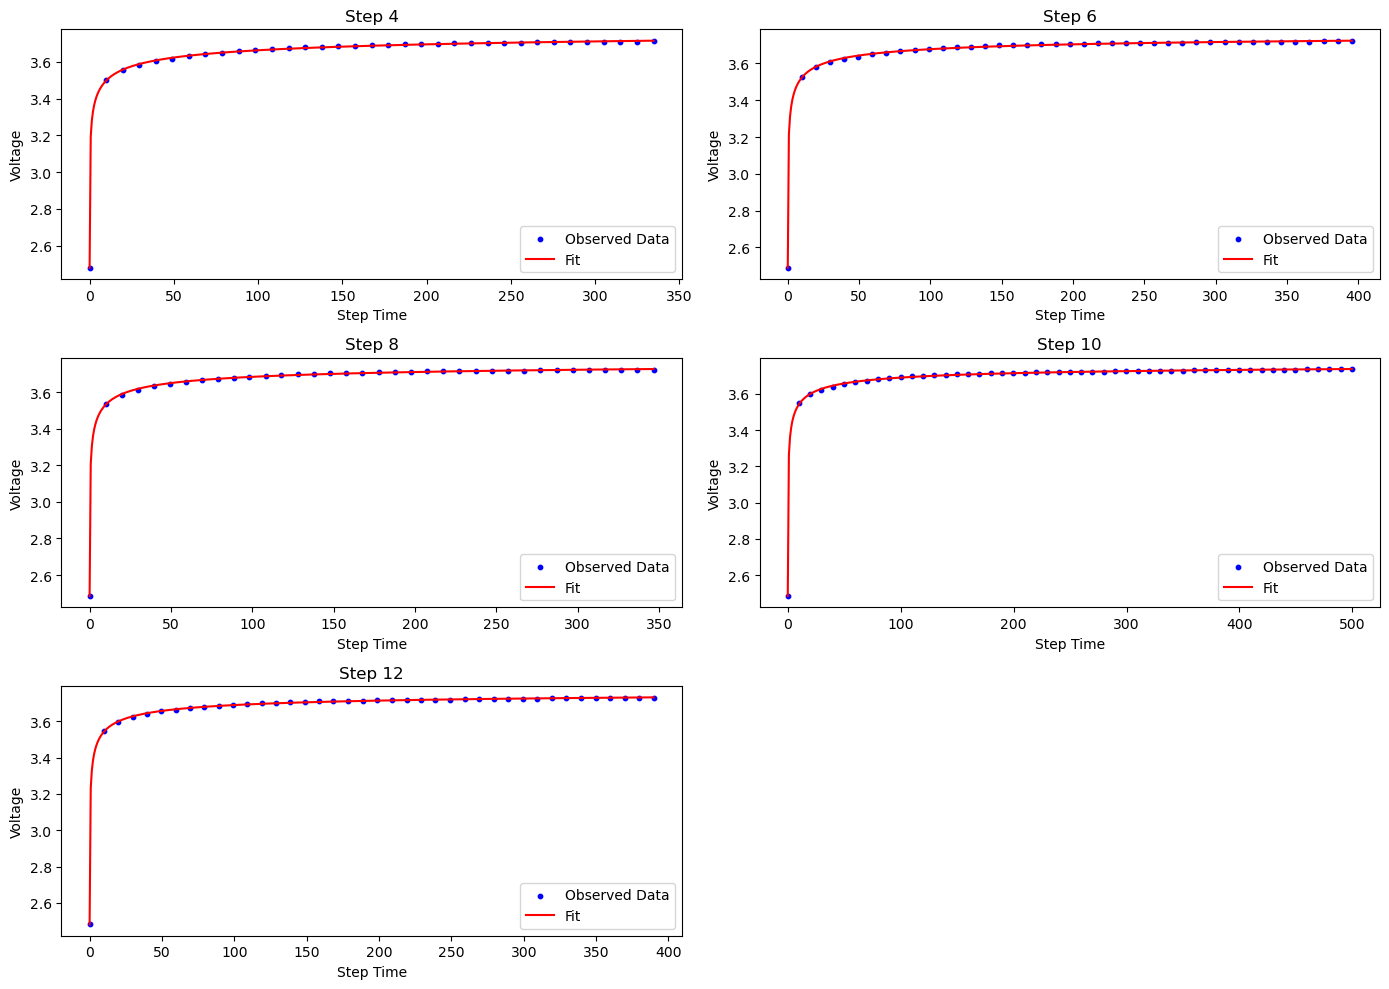

In [43]:
# Plot the observed data and fitted function for each unique step
unique_steps = [4, 6, 8, 10, 12]

num_steps = len(unique_steps)

# Set up a grid of subplots
fig, axes = plt.subplots(nrows=num_steps // 2 + num_steps % 2, ncols=2, figsize=(14, num_steps * 2))
axes = axes.flatten()  # Flatten in case the grid has extra dimensions

for idx, step in enumerate(unique_steps):
    ax = axes[idx]
    step_data = df_55[df_55['Step'] == step].sort_values(by='Step_Time')
    x = step_data['Step_Time'].values
    y_observed = step_data['Voltage'].values
    
    # Retrieve fitted parameters for this step
    L, A, x0, b = fitted_df[fitted_df['Step'] == step][['L', 'A', 'x0', 'b']].iloc[0]

    # Generate predicted values for the fine-grained x (x_fine)
    x_fine = np.linspace(x.min(), x.max(), 500)  # Fine-grained x for a smooth curve
    y_predicted = logistic_like(x_fine, L, A, x0, b)  # Use x_fine for prediction

    # Plot observed data and fitted curve
    ax.scatter(x, y_observed, color='blue', label='Observed Data', s=10)
    ax.plot(x_fine, y_predicted, color='red', label='Fit')  # Now both x_fine and y_predicted are 500 in length
    ax.set_title(f'Step {step}')
    ax.set_xlabel('Step Time')
    ax.set_ylabel('Voltage')
    ax.legend()

# Remove extra axes if any
for ax in axes[len(unique_steps):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [44]:
# Perform a left join on 'Step' column
df_log = pd.merge(df_55, fitted_df, how='left', on='Step')
df_log['Max_Temp'] = df_log.groupby(['Step'])['Temperature'].transform('max')

# Get unique Step and Rebound pairs
per_step = df_log[['Step', 'L', 'A', 'x0', 'b', 'Reference Capacity', 'Max_Temp', 'Ambient_Temperature']].drop_duplicates()
per_step.shape

(102, 8)

In [45]:
per_step.to_csv('C:/Users/Worm/Downloads/New_NASA_Rebound/nasa55_NEW.csv', index = False)

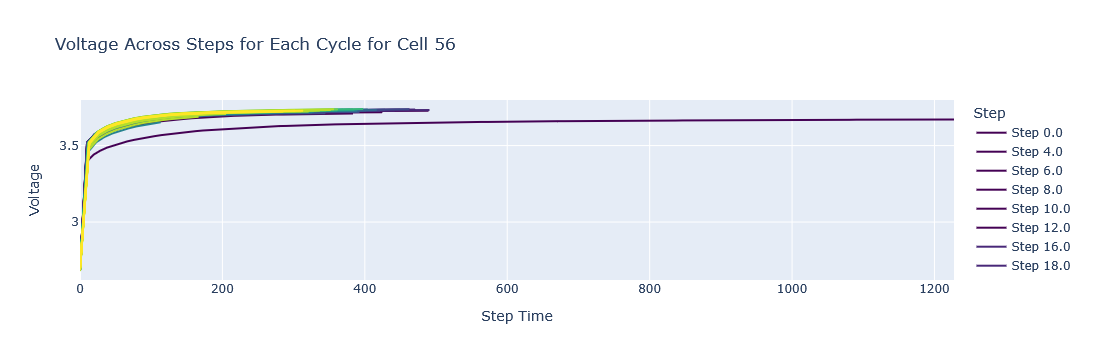

In [46]:
# Cell 56
# Normalize the step to a range from 0 to 1 for color selection
steps = nasa[nasa['Cell'] == 56]['Step'].unique()
max_step = max(steps)

# Create a figure
fig = go.Figure()

# Add a line trace for each unique step
for step in steps:
    step_data = nasa[(nasa['Cell'] == 56) & (nasa['Step'] == step)]
    
    # Select a color from the Viridis color scale based on the normalized step value
    color = px.colors.sequential.Viridis[round((step / max_step) * (len(px.colors.sequential.Viridis) - 1))]
    
    fig.add_trace(
        go.Scatter(
            x=step_data['Step_Time'],
            y=step_data['Voltage'],
            mode='lines',
            name=f'Step {step}',
            line=dict(color=color),
            hoverinfo="text+name",
        )
    )

# Customize layout
fig.update_layout(
    title="Voltage Across Steps for Each Cycle for Cell 56",
    xaxis_title="Step Time",
    yaxis_title="Voltage",
    legend_title="Step"
)

# Show the plot
fig.show()

In [47]:
df_56 = nasa[nasa['Cell'] == 56]

In [48]:
def logistic_like(x, L, A, x0, b):
    """
    Logistic-like function with four parameters.
    L: Asymptotic maximum value
    A: Scaling factor
    x0: Midpoint of the curve
    b: Growth rate
    """
    return L - A / (1 + (x / x0)**b)

# Dataframe to store fitted parameters
fitted_parameters = []

# Iterate over each unique step
for step in df_56['Step'].unique():
    step_data = df_56[df_56['Step'] == step].sort_values(by='Step_Time')
    x = step_data['Step_Time'].values
    y = step_data['Voltage'].values

    # Initial guesses and bounds
    initial_guesses = [max(y), max(y) - min(y), np.median(x), 2]  # Guesses for [L, A, x0, b]
    lower_bounds = [0, 0, 0, 0]  # Set reasonable lower bounds
    upper_bounds = [np.inf, np.inf, np.inf, np.inf]  # Set reasonable upper bounds

    # Fit the curve
    try:
        params, _ = curve_fit(
            logistic_like, x, y,
            p0=initial_guesses,
            bounds=(lower_bounds, upper_bounds)
        )
        # Append the parameters with the step number
        fitted_parameters.append((step, params[0], params[1], params[2], params[3]))

    except RuntimeError:
        print(f"Fit could not be found for Step {step}")

# Convert fitted parameters to a DataFrame
fitted_df = pd.DataFrame(fitted_parameters, columns=['Step', 'L', 'A', 'x0', 'b'])
print(fitted_df)

      Step         L         A        x0         b
0      0.0  3.748539  1.058874  2.279349  0.416459
1      4.0  3.852398  1.166342  0.973270  0.336654
2      6.0  3.804448  1.106358  0.993599  0.421423
3      8.0  3.829500  1.137443  0.924232  0.386149
4     10.0  3.785851  1.087736  1.110071  0.487235
..     ...       ...       ...       ...       ...
97   240.0  3.781334  1.094303  2.061686  0.608929
98   242.0  3.775551  1.077519  2.025115  0.622491
99   244.0  3.797194  1.105177  1.922428  0.554677
100  248.0  3.788633  1.099612  2.043095  0.585425
101  250.0  3.776521  1.081493  2.021253  0.617734

[102 rows x 5 columns]


In [49]:
# Lists to store MSE and R^2 values
mse_list = []
r2_list = []

# Iterate over each fitted step and calculate MSE and R²
for step, L, A, x0, b in fitted_df[['Step', 'L', 'A', 'x0', 'b']].values:
    step_data = df_56[df_56['Step'] == step].sort_values(by='Step_Time')
    x = step_data['Step_Time'].values
    y_observed = step_data['Voltage'].values

    # Use the logistic-like function for prediction (L - A / (1 + (x / x0) ** b))
    y_predicted = logistic_like(x, L, A, x0, b)

    # Calculate R² score
    r2 = r2_score(y_observed, y_predicted)
    r2_list.append(r2)
    
    # Calculate MSE
    mse = np.mean((y_observed - y_predicted) ** 2)
    mse_list.append(mse)

# Add MSE and R² to the fitted_df DataFrame
fitted_df['MSE'] = mse_list
overall_mse = np.mean(mse_list)

fitted_df['R2'] = r2_list
average_r2 = np.mean(r2_list)

# Print the overall MSE and average R²
print(f"Overall MSE across all steps: {overall_mse:.4f}")
print(f"Average R² across all steps: {average_r2:.4f}")

Overall MSE across all steps: 0.0000
Average R² across all steps: 0.9997


In [50]:
# just in case
fitted_df.dropna().head()

Step         L         A        x0         b       MSE        R2
0   0.0  3.748539  1.058874  2.279349  0.416459  0.000024  0.997449
1   4.0  3.852398  1.166342  0.973270  0.336654  0.000013  0.999485
2   6.0  3.804448  1.106358  0.993599  0.421423  0.000019  0.999206
3   8.0  3.829500  1.137443  0.924232  0.386149  0.000014  0.999492
4  10.0  3.785851  1.087736  1.110071  0.487235  0.000019  0.999096

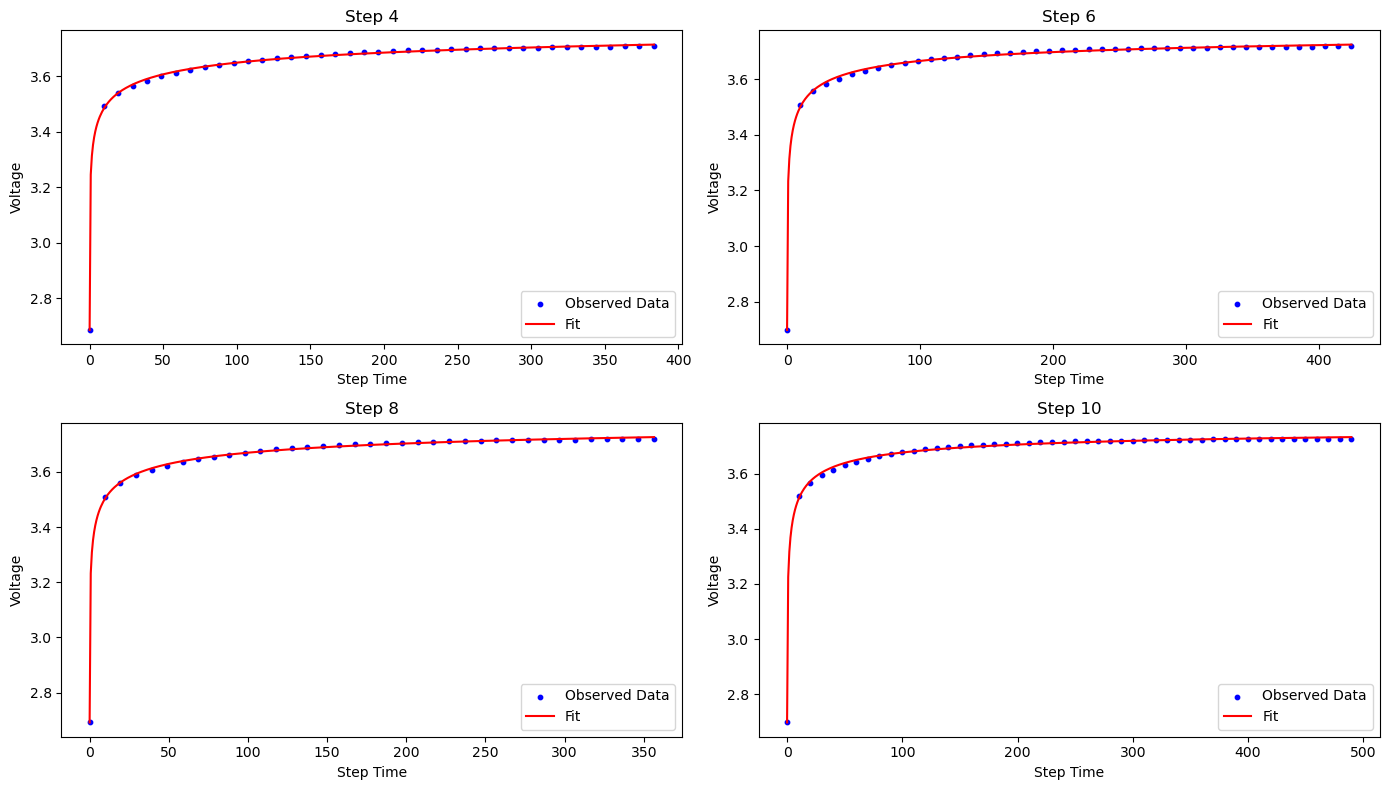

In [51]:
# Plot the observed data and fitted function for each unique step
unique_steps = [4, 6, 8, 10]

num_steps = len(unique_steps)

# Set up a grid of subplots
fig, axes = plt.subplots(nrows=num_steps // 2 + num_steps % 2, ncols=2, figsize=(14, num_steps * 2))
axes = axes.flatten()  # Flatten in case the grid has extra dimensions

for idx, step in enumerate(unique_steps):
    ax = axes[idx]
    step_data = df_56[df_56['Step'] == step].sort_values(by='Step_Time')
    x = step_data['Step_Time'].values
    y_observed = step_data['Voltage'].values
    
    # Retrieve fitted parameters for this step
    L, A, x0, b = fitted_df[fitted_df['Step'] == step][['L', 'A', 'x0', 'b']].iloc[0]

    # Generate predicted values for the fine-grained x (x_fine)
    x_fine = np.linspace(x.min(), x.max(), 500)  # Fine-grained x for a smooth curve
    y_predicted = logistic_like(x_fine, L, A, x0, b)  # Use x_fine for prediction

    # Plot observed data and fitted curve
    ax.scatter(x, y_observed, color='blue', label='Observed Data', s=10)
    ax.plot(x_fine, y_predicted, color='red', label='Fit')  # Now both x_fine and y_predicted are 500 in length
    ax.set_title(f'Step {step}')
    ax.set_xlabel('Step Time')
    ax.set_ylabel('Voltage')
    ax.legend()

# Remove extra axes if any
for ax in axes[len(unique_steps):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [52]:
# Perform a left join on 'Step' column
df_log = pd.merge(df_56, fitted_df, how='left', on='Step')
df_log['Max_Temp'] = df_log.groupby(['Step'])['Temperature'].transform('max')

# Get unique Step and Rebound pairs
per_step = df_log[['Step', 'L', 'A', 'x0', 'b', 'Reference Capacity', 'Max_Temp', 'Ambient_Temperature']].drop_duplicates()
per_step.shape

(102, 8)

In [53]:
per_step.to_csv('C:/Users/Worm/Downloads/New_NASA_Rebound/nasa56_NEW.csv', index = False)

In [57]:
# 45 - 48
nasa = pd.read_csv('C:/Users/Worm/Downloads/New_NASA_Rebound/nasa_rebound_data_NEW4548.csv')
nasa = nasa.drop(nasa.columns[0], axis = 1)

In [58]:
nasa.tail()

Source  Chemistry  Cell  Cycle   Step Cycle_Type         Time  Voltage  \
11346   NASA        NaN  48.0   87.0  174.0  discharge  1067211.193    3.246   
11347   NASA        NaN  48.0   88.0  176.0  discharge  1082558.396    2.684   
11348   NASA        NaN  48.0   88.0  176.0  discharge  1082573.818    3.140   
11349   NASA        NaN  48.0   90.0  180.0  discharge  1113109.818    2.690   
11350   NASA        NaN  48.0   90.0  180.0  discharge  1113125.396    3.156   

       Reference Capacity  Instantaneous Capacity  Charge_Capacity  \
11346            4519.852               -4527.579              NaN   
11347            4507.155               -4507.156              NaN   
11348            4507.155               -4514.833              NaN   
11349            4403.258               -4403.259              NaN   
11350            4403.258               -4411.010              NaN   

       Discharge_Capacity  Temperature  Ambient_Temperature  Current  \
11346                 NaN       10.215                  4.0   -0.002   
11347                 NaN       10.138                  4.0   -0.996   
11348                 NaN       10.055                  4.0    0.000   
11349                 NaN       10.154                  4.0   -0.995   
11350                 NaN       10.208                  4.0   -0.001   

      Charge_Type  Step_Time  Current_Diff  
11346  Continuous     30.937           NaN  
11347  Continuous      0.000           NaN  
11348  Continuous     15.422           NaN  
11349  Continuous      0.000           NaN  
11350  Continuous     15.578           NaN

In [59]:
nasa = nasa.drop(['Source', 'Current_Diff'], axis=1)

In [60]:
nasa.columns

Index(['Chemistry', 'Cell', 'Cycle', 'Step', 'Cycle_Type', 'Time', 'Voltage',
       'Reference Capacity', 'Instantaneous Capacity', 'Charge_Capacity',
       'Discharge_Capacity', 'Temperature', 'Ambient_Temperature', 'Current',
       'Charge_Type', 'Step_Time'],
      dtype='object')

In [61]:
print(nasa[nasa['Cell'] == 45]['Step_Time'].diff())

0          NaN
1       13.235
2       13.312
3       13.266
4       13.312
         ...  
9259    15.437
9260    15.469
9261    15.437
9262    15.422
9263    15.578
Name: Step_Time, Length: 9264, dtype: float64


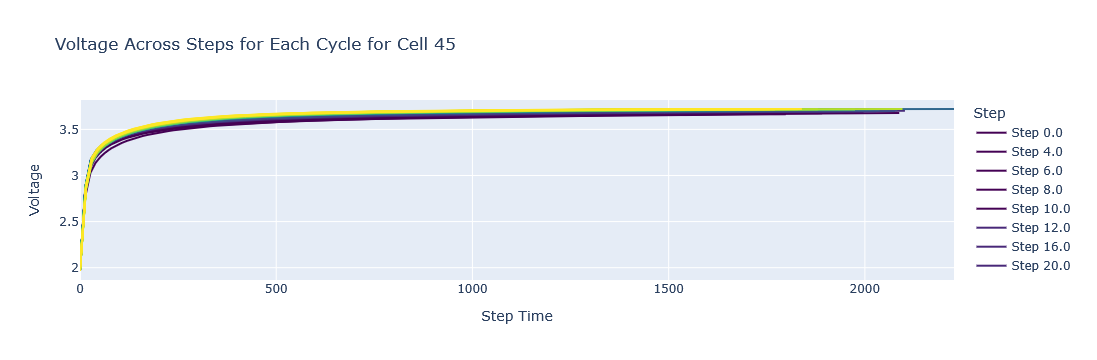

In [62]:
# Cell 45
# Normalize the step to a range from 0 to 1 for color selection
steps = nasa[nasa['Cell'] == 45]['Step'].unique()
max_step = max(steps)

# Create a figure
fig = go.Figure()

# Add a line trace for each unique step
for step in steps:
    step_data = nasa[(nasa['Cell'] == 45) & (nasa['Step'] == step)]
    
    # Select a color from the Viridis color scale based on the normalized step value
    color = px.colors.sequential.Viridis[round((step / max_step) * (len(px.colors.sequential.Viridis) - 1))]
    
    fig.add_trace(
        go.Scatter(
            x=step_data['Step_Time'],
            y=step_data['Voltage'],
            mode='lines',
            name=f'Step {step}',
            line=dict(color=color),
            hoverinfo="text+name",
        )
    )

# Customize layout
fig.update_layout(
    title="Voltage Across Steps for Each Cycle for Cell 45",
    xaxis_title="Step Time",
    yaxis_title="Voltage",
    legend_title="Step"
)

# Show the plot
fig.show()

In [63]:
df_45 = nasa[nasa['Cell'] == 45]

In [64]:
df_45['Step'].nunique()

70

In [65]:
def logistic_like(x, L, A, x0, b):
    """
    Logistic-like function with four parameters.
    L: Asymptotic maximum value
    A: Scaling factor
    x0: Midpoint of the curve
    b: Growth rate
    """
    return L - A / (1 + (x / x0)**b)

# Dataframe to store fitted parameters
fitted_parameters = []

# Iterate over each unique step
for step in df_45['Step'].unique():
    step_data = df_45[df_45['Step'] == step].sort_values(by='Step_Time')
    x = step_data['Step_Time'].values
    y = step_data['Voltage'].values

    # Initial guesses and bounds
    initial_guesses = [max(y), max(y) - min(y), np.median(x), 2]  # Guesses for [L, A, x0, b]
    lower_bounds = [0, 0, 0, 0]  # Set reasonable lower bounds
    upper_bounds = [np.inf, np.inf, np.inf, np.inf]  # Set reasonable upper bounds

    # Fit the curve
    try:
        params, _ = curve_fit(
            logistic_like, x, y,
            p0=initial_guesses,
            bounds=(lower_bounds, upper_bounds)
        )
        # Append the parameters with the step number
        fitted_parameters.append((step, params[0], params[1], params[2], params[3]))

    except RuntimeError:
        print(f"Fit could not be found for Step {step}")

# Convert fitted parameters to a DataFrame
fitted_df = pd.DataFrame(fitted_parameters, columns=['Step', 'L', 'A', 'x0', 'b'])
print(fitted_df)

     Step         L         A         x0         b
0     0.0  3.740389  1.753279  16.288637  0.672263
1     4.0  3.712603  1.729588  13.133116  0.692188
2     6.0  3.722015  1.738003  11.817683  0.681410
3     8.0  3.731969  1.766839  11.708798  0.671317
4    10.0  3.741630  1.762274  11.588521  0.660189
..    ...       ...       ...        ...       ...
65  172.0  3.756715  1.782856  14.184817  0.817100
66  174.0  3.758445  1.775631  13.732022  0.797466
67  176.0  3.759275  1.772242  13.468428  0.797512
68  178.0  3.762048  1.783404  13.607277  0.776997
69  180.0  3.761935  1.794064  13.537636  0.780168

[70 rows x 5 columns]


In [66]:
# Lists to store MSE and R^2 values
mse_list = []
r2_list = []

# Iterate over each fitted step and calculate MSE and R²
for step, L, A, x0, b in fitted_df[['Step', 'L', 'A', 'x0', 'b']].values:
    step_data = df_45[df_45['Step'] == step].sort_values(by='Step_Time')
    x = step_data['Step_Time'].values
    y_observed = step_data['Voltage'].values

    # Use the logistic-like function for prediction (L - A / (1 + (x / x0) ** b))
    y_predicted = logistic_like(x, L, A, x0, b)

    # Calculate R² score
    r2 = r2_score(y_observed, y_predicted)
    r2_list.append(r2)
    
    # Calculate MSE
    mse = np.mean((y_observed - y_predicted) ** 2)
    mse_list.append(mse)

# Add MSE and R² to the fitted_df DataFrame
fitted_df['MSE'] = mse_list
overall_mse = np.mean(mse_list)

fitted_df['R2'] = r2_list
average_r2 = np.mean(r2_list)

# Print the overall MSE and average R²
print(f"Overall MSE across all steps: {overall_mse:.4f}")
print(f"Average R² across all steps: {average_r2:.4f}")

Overall MSE across all steps: 0.0000
Average R² across all steps: 0.9988


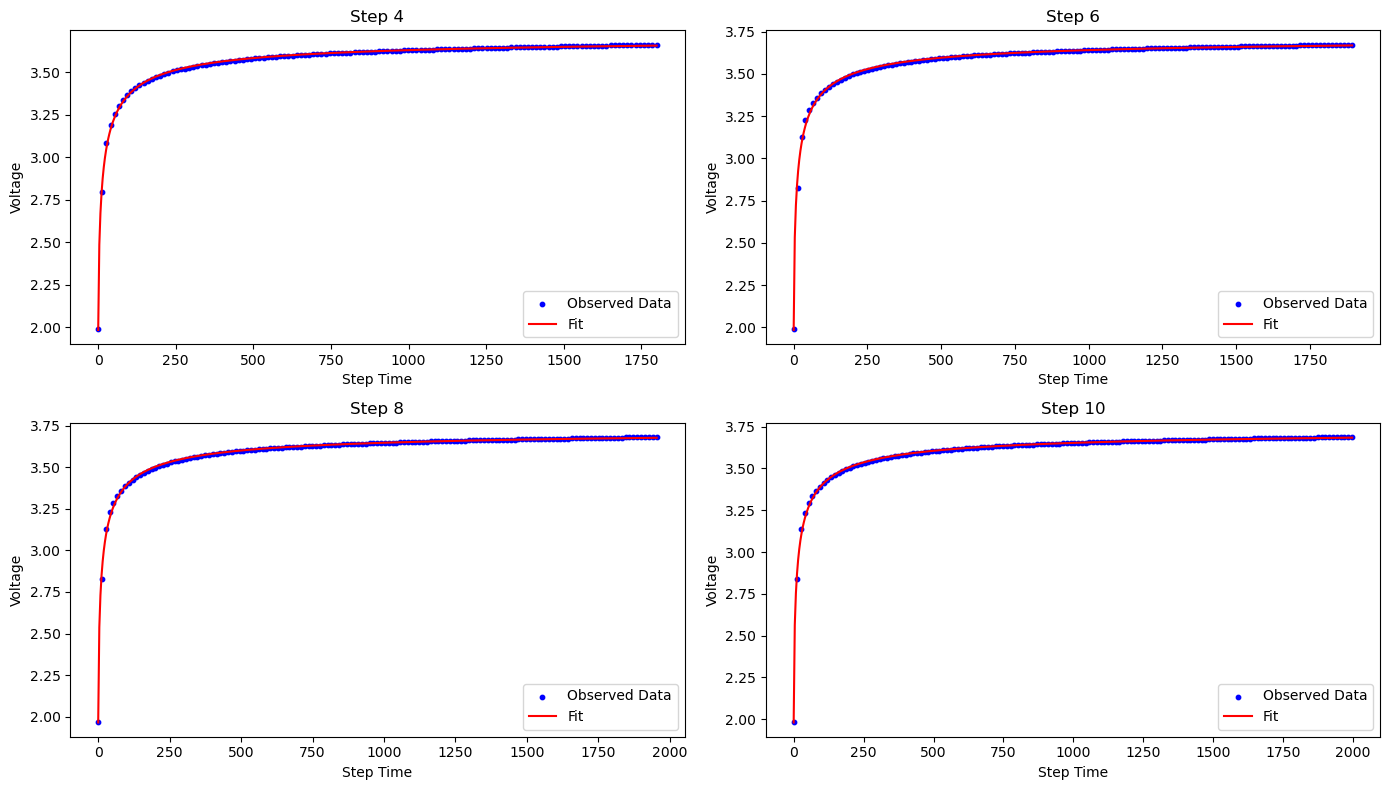

In [67]:
# Plot the observed data and fitted function for each unique step
unique_steps = [4, 6, 8, 10]

num_steps = len(unique_steps)

# Set up a grid of subplots
fig, axes = plt.subplots(nrows=num_steps // 2 + num_steps % 2, ncols=2, figsize=(14, num_steps * 2))
axes = axes.flatten()  # Flatten in case the grid has extra dimensions

for idx, step in enumerate(unique_steps):
    ax = axes[idx]
    step_data = df_45[df_45['Step'] == step].sort_values(by='Step_Time')
    x = step_data['Step_Time'].values
    y_observed = step_data['Voltage'].values
    
    # Retrieve fitted parameters for this step
    L, A, x0, b = fitted_df[fitted_df['Step'] == step][['L', 'A', 'x0', 'b']].iloc[0]

    # Generate predicted values for the fine-grained x (x_fine)
    x_fine = np.linspace(x.min(), x.max(), 500)  # Fine-grained x for a smooth curve
    y_predicted = logistic_like(x_fine, L, A, x0, b)  # Use x_fine for prediction

    # Plot observed data and fitted curve
    ax.scatter(x, y_observed, color='blue', label='Observed Data', s=10)
    ax.plot(x_fine, y_predicted, color='red', label='Fit')  # Now both x_fine and y_predicted are 500 in length
    ax.set_title(f'Step {step}')
    ax.set_xlabel('Step Time')
    ax.set_ylabel('Voltage')
    ax.legend()

# Remove extra axes if any
for ax in axes[len(unique_steps):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [68]:
# Perform a left join on 'Step' column
df_log = pd.merge(df_45, fitted_df, how='left', on='Step')
df_log.head()

Chemistry  Cell  Cycle  Step Cycle_Type      Time  Voltage  \
0        NaN  45.0    0.0   0.0  discharge  4348.625    1.990   
1        NaN  45.0    0.0   0.0  discharge  4361.860    2.766   
2        NaN  45.0    0.0   0.0  discharge  4375.172    3.030   
3        NaN  45.0    0.0   0.0  discharge  4388.438    3.139   
4        NaN  45.0    0.0   0.0  discharge  4401.750    3.206   

   Reference Capacity  Instantaneous Capacity  Charge_Capacity  ...  \
0            4356.636               -4356.655              NaN  ...   
1            4356.636               -4363.304              NaN  ...   
2            4356.636               -4363.306              NaN  ...   
3            4356.636               -4363.313              NaN  ...   
4            4356.636               -4363.304              NaN  ...   

   Ambient_Temperature  Current  Charge_Type  Step_Time         L         A  \
0                  4.0   -1.005   Continuous      0.000  3.740389  1.753279   
1                  4.0    0.000   Continuous     13.235  3.740389  1.753279   
2                  4.0   -0.001   Continuous     26.547  3.740389  1.753279   
3                  4.0   -0.001   Continuous     39.813  3.740389  1.753279   
4                  4.0    0.001   Continuous     53.125  3.740389  1.753279   

          x0         b       MSE        R2  
0  16.288637  0.672263  0.000017  0.999457  
1  16.288637  0.672263  0.000017  0.999457  
2  16.288637  0.672263  0.000017  0.999457  
3  16.288637  0.672263  0.000017  0.999457  
4  16.288637  0.672263  0.000017  0.999457  

[5 rows x 22 columns]

In [69]:
df_log['Max_Temp'] = df_log.groupby(['Step'])['Temperature'].transform('max')

In [70]:
# Get unique Step and Rebound pairs
per_step = df_log[['Step', 'L', 'A', 'x0', 'b', 'Reference Capacity', 'Max_Temp', 'Ambient_Temperature']].drop_duplicates()
per_step.shape

(70, 8)

In [71]:
per_step.to_csv('C:/Users/Worm/Downloads/New_NASA_Rebound/nasa45_NEW.csv', index = False)

In [73]:
# 47
# Cell 47
# Normalize the step to a range from 0 to 1 for color selection
steps = nasa[nasa['Cell'] == 47]['Step'].unique()
max_step = max(steps)

# Create a figure
fig = go.Figure()

# Add a line trace for each unique step
for step in steps:
    step_data = nasa[(nasa['Cell'] == 47) & (nasa['Step'] == step)]
    
    # Select a color from the Viridis color scale based on the normalized step value
    color = px.colors.sequential.Viridis[round((step / max_step) * (len(px.colors.sequential.Viridis) - 1))]
    
    fig.add_trace(
        go.Scatter(
            x=step_data['Step_Time'],
            y=step_data['Voltage'],
            mode='lines',
            name=f'Step {step}',
            line=dict(color=color),
            hoverinfo="text+name",
        )
    )

# Customize layout
fig.update_layout(
    title="Voltage Across Steps for Each Cycle for Cell 47",
    xaxis_title="Step Time",
    yaxis_title="Voltage",
    legend_title="Step"
)

# Show the plot
fig.show()

In [74]:
df_47 = nasa[nasa['Cell'] == 47]

In [75]:
df_47['Step'].nunique()

69

In [76]:
def logistic_like(x, L, A, x0, b):
    """
    Logistic-like function with four parameters.
    L: Asymptotic maximum value
    A: Scaling factor
    x0: Midpoint of the curve
    b: Growth rate
    """
    return L - A / (1 + (x / x0)**b)

# Dataframe to store fitted parameters
fitted_parameters = []

# Iterate over each unique step
for step in df_47['Step'].unique():
    step_data = df_47[df_47['Step'] == step].sort_values(by='Step_Time')
    x = step_data['Step_Time'].values
    y = step_data['Voltage'].values

    # Initial guesses and bounds
    initial_guesses = [max(y), max(y) - min(y), np.median(x), 2]  # Guesses for [L, A, x0, b]
    lower_bounds = [0, 0, 0, 0]  # Set reasonable lower bounds
    upper_bounds = [np.inf, np.inf, np.inf, np.inf]  # Set reasonable upper bounds

    # Fit the curve
    try:
        params, _ = curve_fit(
            logistic_like, x, y,
            p0=initial_guesses,
            bounds=(lower_bounds, upper_bounds)
        )
        # Append the parameters with the step number
        fitted_parameters.append((step, params[0], params[1], params[2], params[3]))

    except RuntimeError:
        print(f"Fit could not be found for Step {step}")

# Convert fitted parameters to a DataFrame
fitted_df = pd.DataFrame(fitted_parameters, columns=['Step', 'L', 'A', 'x0', 'b'])
print(fitted_df)

C:\Users\Worm\AppData\Local\Temp\ipykernel_28084\651775787.py:27: OptimizeWarning:

Covariance of the parameters could not be estimated



     Step         L         A         x0         b
0     0.0  3.637264  1.167378  29.551532  0.472484
1     4.0  3.274523  0.797523   7.814374  0.902817
2     6.0  3.282668  0.812668   7.706827  0.864059
3     8.0  3.389462  0.924469   9.224133  0.700137
4    10.0  3.481525  1.016539  11.784482  0.592785
..    ...       ...       ...        ...       ...
64  172.0  3.876423  1.394489  39.823002  0.495789
65  174.0  3.838211  1.354259  33.780812  0.505372
66  176.0  3.903198  1.422248  40.265323  0.484515
67  178.0  3.880417  1.405455  35.766104  0.493566
68  180.0  3.890877  1.391911  36.915639  0.488147

[69 rows x 5 columns]


In [77]:
# Lists to store MSE and R^2 values
mse_list = []
r2_list = []

# Iterate over each fitted step and calculate MSE and R²
for step, L, A, x0, b in fitted_df[['Step', 'L', 'A', 'x0', 'b']].values:
    step_data = df_47[df_47['Step'] == step].sort_values(by='Step_Time')
    x = step_data['Step_Time'].values
    y_observed = step_data['Voltage'].values

    # Use the logistic-like function for prediction (L - A / (1 + (x / x0) ** b))
    y_predicted = logistic_like(x, L, A, x0, b)

    # Calculate R² score
    r2 = r2_score(y_observed, y_predicted)
    r2_list.append(r2)
    
    # Calculate MSE
    mse = np.mean((y_observed - y_predicted) ** 2)
    mse_list.append(mse)

# Add MSE and R² to the fitted_df DataFrame
fitted_df['MSE'] = mse_list
overall_mse = np.mean(mse_list)

fitted_df['R2'] = r2_list
average_r2 = np.mean(r2_list)

# Print the overall MSE and average R²
print(f"Overall MSE across all steps: {overall_mse:.4f}")
print(f"Average R² across all steps: {average_r2:.4f}")

Overall MSE across all steps: 0.0000
Average R² across all steps: 0.9999


In [78]:
# Plot the observed data and fitted function for each unique step
unique_steps = [4, 6, 8, 10]

num_steps = len(unique_steps)

# Set up a grid of subplots
fig, axes = plt.subplots(nrows=num_steps // 2 + num_steps % 2, ncols=2, figsize=(14, num_steps * 2))
axes = axes.flatten()  # Flatten in case the grid has extra dimensions

for idx, step in enumerate(unique_steps):
    ax = axes[idx]
    step_data = df_47[df_47['Step'] == step].sort_values(by='Step_Time')
    x = step_data['Step_Time'].values
    y_observed = step_data['Voltage'].values
    
    # Retrieve fitted parameters for this step
    L, A, x0, b = fitted_df[fitted_df['Step'] == step][['L', 'A', 'x0', 'b']].iloc[0]

    # Generate predicted values for the fine-grained x (x_fine)
    x_fine = np.linspace(x.min(), x.max(), 500)  # Fine-grained x for a smooth curve
    y_predicted = logistic_like(x_fine, L, A, x0, b)  # Use x_fine for prediction

    # Plot observed data and fitted curve
    ax.scatter(x, y_observed, color='blue', label='Observed Data', s=10)
    ax.plot(x_fine, y_predicted, color='red', label='Fit')  # Now both x_fine and y_predicted are 500 in length
    ax.set_title(f'Step {step}')
    ax.set_xlabel('Step Time')
    ax.set_ylabel('Voltage')
    ax.legend()

# Remove extra axes if any
for ax in axes[len(unique_steps):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [79]:
# Perform a left join on 'Step' column
df_log = pd.merge(df_47, fitted_df, how='left', on='Step')
df_log.head()

Chemistry  Cell  Cycle  Step Cycle_Type      Time  Voltage  \
0        NaN  47.0    0.0   0.0  discharge  6179.110    2.470   
1        NaN  47.0    0.0   0.0  discharge  6192.656    2.942   
2        NaN  47.0    0.0   0.0  discharge  6206.219    3.050   
3        NaN  47.0    0.0   0.0  discharge  6219.719    3.100   
4        NaN  47.0    0.0   0.0  discharge  6233.266    3.136   

   Reference Capacity  Instantaneous Capacity  Charge_Capacity  ...  \
0            6134.145               -6134.151              NaN  ...   
1            6134.145               -6140.894              NaN  ...   
2            6134.145               -6140.916              NaN  ...   
3            6134.145               -6140.947              NaN  ...   
4            6134.145               -6140.962              NaN  ...   

   Ambient_Temperature  Current  Charge_Type  Step_Time         L         A  \
0                  4.0   -0.995   Continuous      0.000  3.637264  1.167378   
1                  4.0   -0.001   Continuous     13.546  3.637264  1.167378   
2                  4.0   -0.003   Continuous     27.109  3.637264  1.167378   
3                  4.0   -0.002   Continuous     40.609  3.637264  1.167378   
4                  4.0   -0.001   Continuous     54.156  3.637264  1.167378   

          x0         b       MSE        R2  
0  29.551532  0.472484  0.000006  0.999835  
1  29.551532  0.472484  0.000006  0.999835  
2  29.551532  0.472484  0.000006  0.999835  
3  29.551532  0.472484  0.000006  0.999835  
4  29.551532  0.472484  0.000006  0.999835  

[5 rows x 22 columns]

In [80]:
df_log['Max_Temp'] = df_log.groupby(['Step'])['Temperature'].transform('max')

In [81]:
# Get unique Step and Rebound pairs
per_step = df_log[['Step', 'L', 'A', 'x0', 'b', 'Reference Capacity', 'Max_Temp', 'Ambient_Temperature']].drop_duplicates()
per_step.shape

(69, 8)

In [82]:
per_step.to_csv('C:/Users/Worm/Downloads/New_NASA_Rebound/nasa47_NEW.csv', index = False)

In [83]:
# 48
# Cell 48
# Normalize the step to a range from 0 to 1 for color selection
steps = nasa[nasa['Cell'] == 48]['Step'].unique()
max_step = max(steps)

# Create a figure
fig = go.Figure()

# Add a line trace for each unique step
for step in steps:
    step_data = nasa[(nasa['Cell'] == 48) & (nasa['Step'] == step)]
    
    # Select a color from the Viridis color scale based on the normalized step value
    color = px.colors.sequential.Viridis[round((step / max_step) * (len(px.colors.sequential.Viridis) - 1))]
    
    fig.add_trace(
        go.Scatter(
            x=step_data['Step_Time'],
            y=step_data['Voltage'],
            mode='lines',
            name=f'Step {step}',
            line=dict(color=color),
            hoverinfo="text+name",
        )
    )

# Customize layout
fig.update_layout(
    title="Voltage Across Steps for Each Cycle for Cell 48",
    xaxis_title="Step Time",
    yaxis_title="Voltage",
    legend_title="Step"
)

# Show the plot
fig.show()

In [84]:
df_48 = nasa[nasa['Cell'] == 48]

In [85]:
df_48['Step'].nunique()

68

In [86]:
def logistic_like(x, L, A, x0, b):
    """
    Logistic-like function with four parameters.
    L: Asymptotic maximum value
    A: Scaling factor
    x0: Midpoint of the curve
    b: Growth rate
    """
    return L - A / (1 + (x / x0)**b)

# Dataframe to store fitted parameters
fitted_parameters = []

# Iterate over each unique step
for step in df_48['Step'].unique():
    step_data = df_48[df_48['Step'] == step].sort_values(by='Step_Time')
    x = step_data['Step_Time'].values
    y = step_data['Voltage'].values

    # Initial guesses and bounds
    initial_guesses = [max(y), max(y) - min(y), np.median(x), 2]  # Guesses for [L, A, x0, b]
    lower_bounds = [0, 0, 0, 0]  # Set reasonable lower bounds
    upper_bounds = [np.inf, np.inf, np.inf, np.inf]  # Set reasonable upper bounds

    # Fit the curve
    try:
        params, _ = curve_fit(
            logistic_like, x, y,
            p0=initial_guesses,
            bounds=(lower_bounds, upper_bounds)
        )
        # Append the parameters with the step number
        fitted_parameters.append((step, params[0], params[1], params[2], params[3]))

    except RuntimeError:
        print(f"Fit could not be found for Step {step}")

# Convert fitted parameters to a DataFrame
fitted_df = pd.DataFrame(fitted_parameters, columns=['Step', 'L', 'A', 'x0', 'b'])
print(fitted_df)

     Step         L         A         x0         b
0     0.0  3.839351  1.152308  55.309675  0.373361
1     4.0  3.803510  1.120530  46.105152  0.363143
2     6.0  3.862455  1.186472  60.795660  0.351806
3     8.0  3.911328  1.218349  63.277631  0.334411
4    10.0  3.977994  1.282013  75.648198  0.327150
..    ...       ...       ...        ...       ...
63  168.0  4.053143  1.367157  90.792453  0.425636
64  172.0  3.761847  1.062848  29.368878  0.507540
65  174.0  3.198999  0.508999   0.308223  5.962126
66  176.0  3.190154  0.506154   7.791413  3.232986
67  180.0  3.207044  0.517044   7.870066  3.238898

[68 rows x 5 columns]


C:\Users\Worm\AppData\Local\Temp\ipykernel_28084\1730543368.py:27: OptimizeWarning:

Covariance of the parameters could not be estimated



In [87]:
# Lists to store MSE and R^2 values
mse_list = []
r2_list = []

# Iterate over each fitted step and calculate MSE and R²
for step, L, A, x0, b in fitted_df[['Step', 'L', 'A', 'x0', 'b']].values:
    step_data = df_48[df_48['Step'] == step].sort_values(by='Step_Time')
    x = step_data['Step_Time'].values
    y_observed = step_data['Voltage'].values

    # Use the logistic-like function for prediction (L - A / (1 + (x / x0) ** b))
    y_predicted = logistic_like(x, L, A, x0, b)

    # Calculate R² score
    r2 = r2_score(y_observed, y_predicted)
    r2_list.append(r2)
    
    # Calculate MSE
    mse = np.mean((y_observed - y_predicted) ** 2)
    mse_list.append(mse)

# Add MSE and R² to the fitted_df DataFrame
fitted_df['MSE'] = mse_list
overall_mse = np.mean(mse_list)

fitted_df['R2'] = r2_list
average_r2 = np.mean(r2_list)

# Print the overall MSE and average R²
print(f"Overall MSE across all steps: {overall_mse:.4f}")
print(f"Average R² across all steps: {average_r2:.4f}")

Overall MSE across all steps: 0.0000
Average R² across all steps: 0.9996


In [88]:
# Plot the observed data and fitted function for each unique step
unique_steps = [4, 6, 8, 10]

num_steps = len(unique_steps)

# Set up a grid of subplots
fig, axes = plt.subplots(nrows=num_steps // 2 + num_steps % 2, ncols=2, figsize=(14, num_steps * 2))
axes = axes.flatten()  # Flatten in case the grid has extra dimensions

for idx, step in enumerate(unique_steps):
    ax = axes[idx]
    step_data = df_48[df_48['Step'] == step].sort_values(by='Step_Time')
    x = step_data['Step_Time'].values
    y_observed = step_data['Voltage'].values
    
    # Retrieve fitted parameters for this step
    L, A, x0, b = fitted_df[fitted_df['Step'] == step][['L', 'A', 'x0', 'b']].iloc[0]

    # Generate predicted values for the fine-grained x (x_fine)
    x_fine = np.linspace(x.min(), x.max(), 500)  # Fine-grained x for a smooth curve
    y_predicted = logistic_like(x_fine, L, A, x0, b)  # Use x_fine for prediction

    # Plot observed data and fitted curve
    ax.scatter(x, y_observed, color='blue', label='Observed Data', s=10)
    ax.plot(x_fine, y_predicted, color='red', label='Fit')  # Now both x_fine and y_predicted are 500 in length
    ax.set_title(f'Step {step}')
    ax.set_xlabel('Step Time')
    ax.set_ylabel('Voltage')
    ax.legend()

# Remove extra axes if any
for ax in axes[len(unique_steps):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [89]:
# Perform a left join on 'Step' column
df_log = pd.merge(df_48, fitted_df, how='left', on='Step')
df_log.head()

Chemistry  Cell  Cycle  Step Cycle_Type      Time  Voltage  \
0        NaN  48.0    0.0   0.0  discharge  6004.953    2.687   
1        NaN  48.0    0.0   0.0  discharge  6018.360    3.114   
2        NaN  48.0    0.0   0.0  discharge  6031.735    3.189   
3        NaN  48.0    0.0   0.0  discharge  6045.141    3.229   
4        NaN  48.0    0.0   0.0  discharge  6058.500    3.258   

   Reference Capacity  Instantaneous Capacity  Charge_Capacity  ...  \
0            5968.777               -5968.778              NaN  ...   
1            5968.777               -5975.464              NaN  ...   
2            5968.777               -5975.481              NaN  ...   
3            5968.777               -5975.517              NaN  ...   
4            5968.777               -5975.538              NaN  ...   

   Ambient_Temperature  Current  Charge_Type  Step_Time         L         A  \
0                  4.0   -0.997   Continuous      0.000  3.839351  1.152308   
1                  4.0   -0.001   Continuous     13.407  3.839351  1.152308   
2                  4.0   -0.002   Continuous     26.782  3.839351  1.152308   
3                  4.0   -0.004   Continuous     40.188  3.839351  1.152308   
4                  4.0    0.000   Continuous     53.547  3.839351  1.152308   

          x0         b       MSE        R2  
0  55.309675  0.373361  0.000001  0.999935  
1  55.309675  0.373361  0.000001  0.999935  
2  55.309675  0.373361  0.000001  0.999935  
3  55.309675  0.373361  0.000001  0.999935  
4  55.309675  0.373361  0.000001  0.999935  

[5 rows x 22 columns]

In [90]:
df_log['Max_Temp'] = df_log.groupby(['Step'])['Temperature'].transform('max')

In [91]:
# Get unique Step and Rebound pairs
per_step = df_log[['Step', 'L', 'A', 'x0', 'b', 'Reference Capacity', 'Max_Temp', 'Ambient_Temperature']].drop_duplicates()
per_step.shape

(68, 8)

In [92]:
per_step.to_csv('C:/Users/Worm/Downloads/New_NASA_Rebound/nasa48_NEW.csv', index = False)

In [93]:
# cell 5 - 18
nasa = pd.read_csv('C:/Users/Worm/Downloads/New_NASA_Rebound/nasa_rebound_data_NEW518.csv')
nasa = nasa.drop(nasa.columns[0], axis = 1)

In [94]:
nasa = nasa.drop(['Source', 'Current_Diff'], axis=1)

In [95]:
nasa.tail()

Chemistry  Cell  Cycle   Step Cycle_Type         Time  Voltage  \
15260        NaN  18.0  159.0  318.0  discharge  1779884.839    3.443   
15261        NaN  18.0  159.0  318.0  discharge  1779899.026    3.453   
15262        NaN  18.0  159.0  318.0  discharge  1779913.120    3.461   
15263        NaN  18.0  159.0  318.0  discharge  1779927.230    3.469   
15264        NaN  18.0  159.0  318.0  discharge  1779941.323    3.477   

       Reference Capacity  Instantaneous Capacity  Charge_Capacity  \
15260            4883.324               -4897.589              NaN   
15261            4883.324               -4897.613              NaN   
15262            4883.324               -4897.618              NaN   
15263            4883.324               -4897.606              NaN   
15264            4883.324               -4897.609              NaN   

       Discharge_Capacity  Temperature  Ambient_Temperature  Current  \
15260                 NaN       35.383                 24.0   -0.003   
15261                 NaN       35.179                 24.0   -0.001   
15262                 NaN       34.976                 24.0    0.000   
15263                 NaN       34.785                 24.0    0.001   
15264                 NaN       34.581                 24.0   -0.002   

      Charge_Type  Step_Time  
15260  Continuous    238.672  
15261  Continuous    252.859  
15262  Continuous    266.953  
15263  Continuous    281.063  
15264  Continuous    295.156

In [96]:
#5
# Normalize the step to a range from 0 to 1 for color selection
steps = nasa[nasa['Cell'] == 5]['Step'].unique()
max_step = max(steps)

# Create a figure
fig = go.Figure()

# Add a line trace for each unique step
for step in steps:
    step_data = nasa[(nasa['Cell'] == 5) & (nasa['Step'] == step)]
    
    # Select a color from the Viridis color scale based on the normalized step value
    color = px.colors.sequential.Viridis[round((step / max_step) * (len(px.colors.sequential.Viridis) - 1))]
    
    fig.add_trace(
        go.Scatter(
            x=step_data['Step_Time'],
            y=step_data['Voltage'],
            mode='lines',
            name=f'Step {step}',
            line=dict(color=color),
            hoverinfo="text+name",
        )
    )

# Customize layout
fig.update_layout(
    title="Voltage Across Steps for Each Cycle for Cell 5",
    xaxis_title="Step Time",
    yaxis_title="Voltage",
    legend_title="Step"
)

# Show the plot
fig.show()

In [97]:
df_5 = nasa[nasa['Cell'] == 5]
df_5['Step'].nunique()

168

In [98]:
def logistic_like(x, L, A, x0, b):
    """
    Logistic-like function with four parameters.
    L: Asymptotic maximum value
    A: Scaling factor
    x0: Midpoint of the curve
    b: Growth rate
    """
    return L - A / (1 + (x / x0)**b)

# Dataframe to store fitted parameters
fitted_parameters = []

# Iterate over each unique step
for step in df_5['Step'].unique():
    step_data = df_5[df_5['Step'] == step].sort_values(by='Step_Time')
    x = step_data['Step_Time'].values
    y = step_data['Voltage'].values

    # Initial guesses and bounds
    initial_guesses = [max(y), max(y) - min(y), np.median(x), 2]  # Guesses for [L, A, x0, b]
    lower_bounds = [0, 0, 0, 0]  # Set reasonable lower bounds
    upper_bounds = [np.inf, np.inf, np.inf, np.inf]  # Set reasonable upper bounds

    # Fit the curve
    try:
        params, _ = curve_fit(
            logistic_like, x, y,
            p0=initial_guesses,
            bounds=(lower_bounds, upper_bounds)
        )
        # Append the parameters with the step number
        fitted_parameters.append((step, params[0], params[1], params[2], params[3]))

    except RuntimeError:
        print(f"Fit could not be found for Step {step}")

# Convert fitted parameters to a DataFrame
fitted_df = pd.DataFrame(fitted_parameters, columns=['Step', 'L', 'A', 'x0', 'b'])
print(fitted_df)

      Step         L         A         x0         b
0      1.0  3.446644  0.834568  26.845452  0.541042
1      3.0  3.498270  0.911179  32.042960  0.543657
2      5.0  3.517219  0.866151  34.067083  0.552785
3      7.0  3.524842  0.932770  33.290097  0.546674
4      9.0  3.522964  0.975892  32.070758  0.544887
..     ...       ...       ...        ...       ...
163  599.0  3.902917  1.233676  49.769560  0.538280
164  603.0  3.901392  1.204147  50.447520  0.537393
165  607.0  3.898347  1.218136  49.392281  0.540613
166  611.0  3.904780  1.225626  56.620939  0.529984
167  613.0  3.912188  1.256129  55.774859  0.521726

[168 rows x 5 columns]


In [99]:
# Lists to store MSE and R^2 values
mse_list = []
r2_list = []

# Iterate over each fitted step and calculate MSE and R²
for step, L, A, x0, b in fitted_df[['Step', 'L', 'A', 'x0', 'b']].values:
    step_data = df_5[df_5['Step'] == step].sort_values(by='Step_Time')
    x = step_data['Step_Time'].values
    y_observed = step_data['Voltage'].values

    # Use the logistic-like function for prediction (L - A / (1 + (x / x0) ** b))
    y_predicted = logistic_like(x, L, A, x0, b)

    # Calculate R² score
    r2 = r2_score(y_observed, y_predicted)
    r2_list.append(r2)
    
    # Calculate MSE
    mse = np.mean((y_observed - y_predicted) ** 2)
    mse_list.append(mse)

# Add MSE and R² to the fitted_df DataFrame
fitted_df['MSE'] = mse_list
overall_mse = np.mean(mse_list)

fitted_df['R2'] = r2_list
average_r2 = np.mean(r2_list)

# Print the overall MSE and average R²
print(f"Overall MSE across all steps: {overall_mse:.4f}")
print(f"Average R² across all steps: {average_r2:.4f}")

Overall MSE across all steps: 0.0000
Average R² across all steps: 0.9998


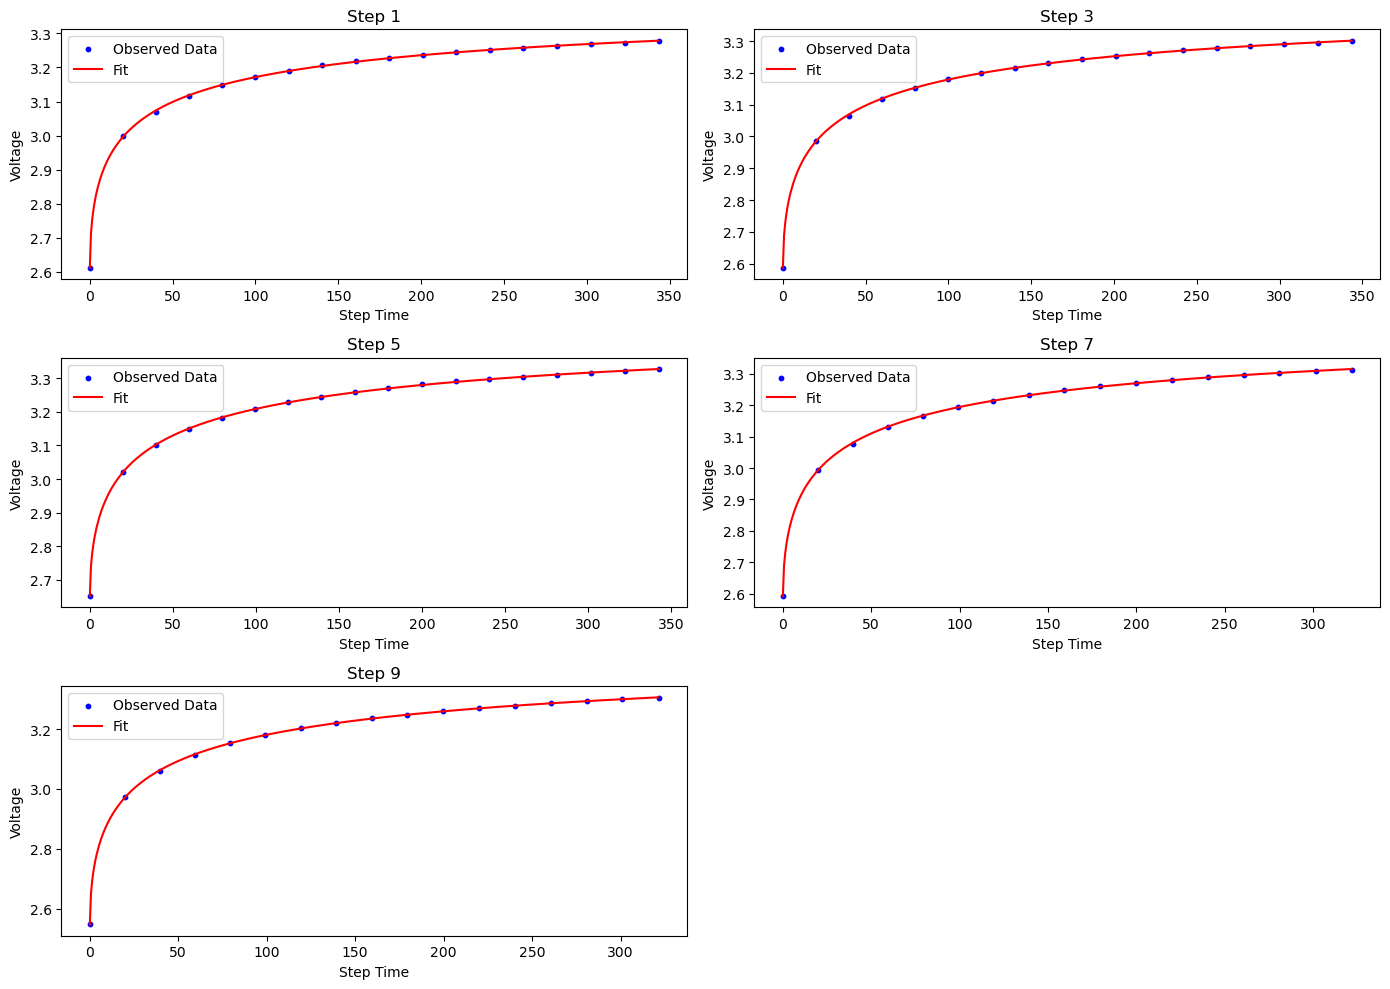

In [100]:
# Plot the observed data and fitted function for each unique step
unique_steps = [1, 3, 5, 7, 9]

num_steps = len(unique_steps)

# Set up a grid of subplots
fig, axes = plt.subplots(nrows=num_steps // 2 + num_steps % 2, ncols=2, figsize=(14, num_steps * 2))
axes = axes.flatten()  # Flatten in case the grid has extra dimensions

for idx, step in enumerate(unique_steps):
    ax = axes[idx]
    step_data = df_5[df_5['Step'] == step].sort_values(by='Step_Time')
    x = step_data['Step_Time'].values
    y_observed = step_data['Voltage'].values
    
    # Retrieve fitted parameters for this step
    L, A, x0, b = fitted_df[fitted_df['Step'] == step][['L', 'A', 'x0', 'b']].iloc[0]

    # Generate predicted values for the fine-grained x (x_fine)
    x_fine = np.linspace(x.min(), x.max(), 500)  # Fine-grained x for a smooth curve
    y_predicted = logistic_like(x_fine, L, A, x0, b)  # Use x_fine for prediction

    # Plot observed data and fitted curve
    ax.scatter(x, y_observed, color='blue', label='Observed Data', s=10)
    ax.plot(x_fine, y_predicted, color='red', label='Fit')  # Now both x_fine and y_predicted are 500 in length
    ax.set_title(f'Step {step}')
    ax.set_xlabel('Step Time')
    ax.set_ylabel('Voltage')
    ax.legend()

# Remove extra axes if any
for ax in axes[len(unique_steps):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [101]:
# Perform a left join on 'Step' column
df_log = pd.merge(df_5, fitted_df, how='left', on='Step')
df_log.head()

Chemistry  Cell  Cycle  Step Cycle_Type       Time  Voltage  \
0        NaN   5.0    0.0   1.0  discharge  10944.811    2.612   
1        NaN   5.0    0.0   1.0  discharge  10964.655    2.998   
2        NaN   5.0    0.0   1.0  discharge  10984.515    3.070   
3        NaN   5.0    0.0   1.0  discharge  11004.530    3.116   
4        NaN   5.0    0.0   1.0  discharge  11024.499    3.148   

   Reference Capacity  Instantaneous Capacity  Charge_Capacity  ...  \
0            6683.354               -6683.355              NaN  ...   
1            6683.354               -6703.366              NaN  ...   
2            6683.354               -6703.437              NaN  ...   
3            6683.354               -6703.469              NaN  ...   
4            6683.354               -6703.483              NaN  ...   

   Ambient_Temperature  Current  Charge_Type  Step_Time         L         A  \
0                 24.0   -2.013   Continuous      0.000  3.446644  0.834568   
1                 24.0   -0.005   Continuous     19.844  3.446644  0.834568   
2                 24.0   -0.003   Continuous     39.704  3.446644  0.834568   
3                 24.0   -0.001   Continuous     59.719  3.446644  0.834568   
4                 24.0   -0.002   Continuous     79.688  3.446644  0.834568   

          x0         b       MSE        R2  
0  26.845452  0.541042  0.000002  0.999912  
1  26.845452  0.541042  0.000002  0.999912  
2  26.845452  0.541042  0.000002  0.999912  
3  26.845452  0.541042  0.000002  0.999912  
4  26.845452  0.541042  0.000002  0.999912  

[5 rows x 22 columns]

In [102]:
df_log['Max_Temp'] = df_log.groupby(['Step'])['Temperature'].transform('max')

In [103]:
# Get unique Step and Rebound pairs
per_step = df_log[['Step', 'L', 'A', 'x0', 'b', 'Reference Capacity', 'Max_Temp', 'Ambient_Temperature']].drop_duplicates()
per_step.shape

(168, 8)

In [104]:
per_step.to_csv('C:/Users/Worm/Downloads/New_NASA_Rebound/nasa5_NEW.csv', index = False)

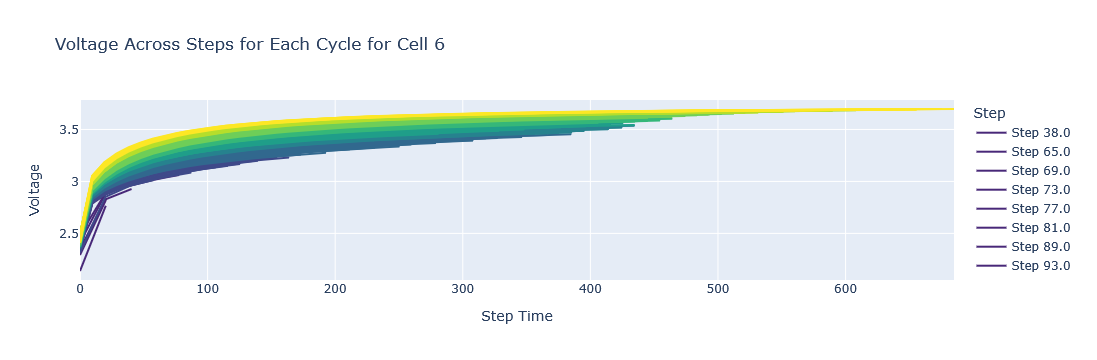

In [198]:
# 6
# Normalize the step to a range from 0 to 1 for color selection
steps = nasa[nasa['Cell'] == 6]['Step'].unique()
max_step = max(steps)

# Create a figure
fig = go.Figure()

# Add a line trace for each unique step
for step in steps:
    step_data = nasa[(nasa['Cell'] == 6) & (nasa['Step'] == step)]
    
    # Select a color from the Viridis color scale based on the normalized step value
    color = px.colors.sequential.Viridis[round((step / max_step) * (len(px.colors.sequential.Viridis) - 1))]
    
    fig.add_trace(
        go.Scatter(
            x=step_data['Step_Time'],
            y=step_data['Voltage'],
            mode='lines',
            name=f'Step {step}',
            line=dict(color=color),
            hoverinfo="text+name",
        )
    )

# Customize layout
fig.update_layout(
    title="Voltage Across Steps for Each Cycle for Cell 6",
    xaxis_title="Step Time",
    yaxis_title="Voltage",
    legend_title="Step"
)

# Show the plot
fig.show()

In [199]:
df_6 = nasa[nasa['Cell'] == 6]
df_6['Step'].nunique()

143

In [200]:
def logistic_like(x, L, A, x0, b):
    """
    Logistic-like function with four parameters.
    L: Asymptotic maximum value
    A: Scaling factor
    x0: Midpoint of the curve
    b: Growth rate
    """
    return L - A / (1 + (x / x0)**b)

# Dataframe to store fitted parameters
fitted_parameters = []

# Iterate over each unique step
for step in df_6['Step'].unique():
    step_data = df_6[df_6['Step'] == step].sort_values(by='Step_Time')
    x = step_data['Step_Time'].values
    y = step_data['Voltage'].values

    # Initial guesses and bounds
    initial_guesses = [max(y), max(y) - min(y), np.median(x), 2]  # Guesses for [L, A, x0, b]
    lower_bounds = [0, 0, 0, 0]  # Set reasonable lower bounds
    upper_bounds = [np.inf, np.inf, np.inf, np.inf]  # Set reasonable upper bounds

    # Fit the curve
    try:
        params, _ = curve_fit(
            logistic_like, x, y,
            p0=initial_guesses,
            bounds=(lower_bounds, upper_bounds)
        )
        # Append the parameters with the step number
        fitted_parameters.append((step, params[0], params[1], params[2], params[3]))

    except RuntimeError:
        print(f"Fit could not be found for Step {step}")

# Convert fitted parameters to a DataFrame
fitted_df = pd.DataFrame(fitted_parameters, columns=['Step', 'L', 'A', 'x0', 'b'])
print(fitted_df)

C:\Users\Worm\AppData\Local\Temp\ipykernel_28084\935893258.py:27: OptimizeWarning:

Covariance of the parameters could not be estimated



Fit could not be found for Step 77.0
Fit could not be found for Step 97.0
Fit could not be found for Step 105.0
Fit could not be found for Step 109.0
Fit could not be found for Step 113.0
Fit could not be found for Step 117.0
Fit could not be found for Step 121.0
Fit could not be found for Step 135.0
Fit could not be found for Step 157.0
Fit could not be found for Step 161.0
      Step         L         A         x0         b
0     38.0  2.935810  0.524810  10.111928  3.213261
1     65.0  2.834771  0.696771  10.018419  3.156892
2     69.0  2.886793  0.540793  10.127891  3.262240
3     73.0  3.429183  1.102183  28.437283  0.516454
4     81.0  2.874743  0.582743  10.135627  3.264043
..     ...       ...       ...        ...       ...
128  599.0  3.787935  1.303266  16.034399  0.712318
129  603.0  3.787770  1.293084  15.869820  0.715360
130  607.0  3.788874  1.376346  15.121811  0.717214
131  611.0  3.780680  1.302798  14.721045  0.713947
132  613.0  3.787809  1.369223  14.354327  0.69413

In [201]:
# Lists to store MSE and R^2 values
mse_list = []
r2_list = []

# Iterate over each fitted step and calculate MSE and R²
for step, L, A, x0, b in fitted_df[['Step', 'L', 'A', 'x0', 'b']].values:
    step_data = df_6[df_6['Step'] == step].sort_values(by='Step_Time')
    x = step_data['Step_Time'].values
    y_observed = step_data['Voltage'].values

    # Use the logistic-like function for prediction (L - A / (1 + (x / x0) ** b))
    y_predicted = logistic_like(x, L, A, x0, b)

    # Calculate R² score
    r2 = r2_score(y_observed, y_predicted)
    r2_list.append(r2)
    
    # Calculate MSE
    mse = np.mean((y_observed - y_predicted) ** 2)
    mse_list.append(mse)

# Add MSE and R² to the fitted_df DataFrame
fitted_df['MSE'] = mse_list
overall_mse = np.mean(mse_list)

fitted_df['R2'] = r2_list
average_r2 = np.mean(r2_list)

# Print the overall MSE and average R²
print(f"Overall MSE across all steps: {overall_mse:.4f}")
print(f"Average R² across all steps: {average_r2:.4f}")

Overall MSE across all steps: 0.0000
Average R² across all steps: 0.9994


In [202]:
# Plot the observed data and fitted function for each unique step
unique_steps = [38, 65, 73, 69]

num_steps = len(unique_steps)

# Set up a grid of subplots
fig, axes = plt.subplots(nrows=num_steps // 2 + num_steps % 2, ncols=2, figsize=(14, num_steps * 2))
axes = axes.flatten()  # Flatten in case the grid has extra dimensions

for idx, step in enumerate(unique_steps):
    ax = axes[idx]
    step_data = df_6[df_6['Step'] == step].sort_values(by='Step_Time')
    x = step_data['Step_Time'].values
    y_observed = step_data['Voltage'].values
    
    # Retrieve fitted parameters for this step
    L, A, x0, b = fitted_df[fitted_df['Step'] == step][['L', 'A', 'x0', 'b']].iloc[0]

    # Generate predicted values for the fine-grained x (x_fine)
    x_fine = np.linspace(x.min(), x.max(), 500)  # Fine-grained x for a smooth curve
    y_predicted = logistic_like(x_fine, L, A, x0, b)  # Use x_fine for prediction

    # Plot observed data and fitted curve
    ax.scatter(x, y_observed, color='blue', label='Observed Data', s=10)
    ax.plot(x_fine, y_predicted, color='red', label='Fit')  # Now both x_fine and y_predicted are 500 in length
    ax.set_title(f'Step {step}')
    ax.set_xlabel('Step Time')
    ax.set_ylabel('Voltage')
    ax.legend()

# Remove extra axes if any
for ax in axes[len(unique_steps):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [209]:
# Perform a left join on 'Step' column
df_log = pd.merge(df_6, fitted_df, how='left', on='Step')
df_log.head()

Chemistry  Cell  Cycle  Step Cycle_Type        Time  Voltage  \
0        NaN   6.0   19.0  38.0  discharge  269211.674    2.411   
1        NaN   6.0   19.0  38.0  discharge  269231.799    2.884   
2        NaN   6.0   32.0  65.0  discharge  365665.626    2.138   
3        NaN   6.0   32.0  65.0  discharge  365685.813    2.766   
4        NaN   6.0   34.0  69.0  discharge  379695.438    2.346   

   Reference Capacity  Instantaneous Capacity  Charge_Capacity  ...  \
0            6723.245               -6723.322              NaN  ...   
1            6723.245               -6743.574              NaN  ...   
2            6803.491               -6803.492              NaN  ...   
3            6803.491               -6823.828              NaN  ...   
4            6766.242               -6766.254              NaN  ...   

   Ambient_Temperature  Current  Charge_Type  Step_Time         L         A  \
0                 24.0   -2.011   Continuous      0.000  2.935810  0.524810   
1                 24.0   -0.003   Continuous     20.125  2.935810  0.524810   
2                 24.0   -2.014   Continuous      0.000  2.834771  0.696771   
3                 24.0   -0.002   Continuous     20.187  2.834771  0.696771   
4                 24.0   -2.009   Continuous      0.000  2.886793  0.540793   

          x0         b           MSE   R2  
0  10.111928  3.213261  2.676848e-18  1.0  
1  10.111928  3.213261  2.676848e-18  1.0  
2  10.018419  3.156892  1.440766e-16  1.0  
3  10.018419  3.156892  1.440766e-16  1.0  
4  10.127891  3.262240  5.334067e-18  1.0  

[5 rows x 22 columns]

In [210]:
df_log[df_log['Step'] == 77].head()

Chemistry  Cell  Cycle  Step Cycle_Type        Time  Voltage  \
9         NaN   6.0   38.0  77.0  discharge  407164.688    2.486   
10        NaN   6.0   38.0  77.0  discharge  407184.673    2.889   
11        NaN   6.0   38.0  77.0  discharge  407204.688    2.975   
12        NaN   6.0   38.0  77.0  discharge  407224.938    3.032   
13        NaN   6.0   38.0  77.0  discharge  407245.141    3.077   

    Reference Capacity  Instantaneous Capacity  Charge_Capacity  ...  \
9             6642.704               -6642.720              NaN  ...   
10            6642.704               -6662.822              NaN  ...   
11            6642.704               -6662.836              NaN  ...   
12            6642.704               -6662.842              NaN  ...   
13            6642.704               -6662.918              NaN  ...   

    Ambient_Temperature  Current  Charge_Type  Step_Time   L   A  x0   b  MSE  \
9                  24.0   -2.011   Continuous      0.000 NaN NaN NaN NaN  NaN   
10                 24.0   -0.002   Continuous     19.985 NaN NaN NaN NaN  NaN   
11                 24.0    0.000   Continuous     40.000 NaN NaN NaN NaN  NaN   
12                 24.0   -0.001   Continuous     60.250 NaN NaN NaN NaN  NaN   
13                 24.0   -0.007   Continuous     80.453 NaN NaN NaN NaN  NaN   

    R2  
9  NaN  
10 NaN  
11 NaN  
12 NaN  
13 NaN  

[5 rows x 22 columns]

In [211]:
df_log = df_log[~df_log['Step'].isin([77, 97, 105, 109, 113, 117, 121, 135, 157, 161])]

In [213]:
df_log

Chemistry  Cell  Cycle   Step Cycle_Type         Time  Voltage  \
0           NaN   6.0   19.0   38.0  discharge   269211.674    2.411   
1           NaN   6.0   19.0   38.0  discharge   269231.799    2.884   
2           NaN   6.0   32.0   65.0  discharge   365665.626    2.138   
3           NaN   6.0   32.0   65.0  discharge   365685.813    2.766   
4           NaN   6.0   34.0   69.0  discharge   379695.438    2.346   
...         ...   ...    ...    ...        ...          ...      ...   
5733        NaN   6.0  306.0  613.0  discharge  2285372.085    3.689   
5734        NaN   6.0  306.0  613.0  discharge  2285381.835    3.690   
5735        NaN   6.0  306.0  613.0  discharge  2285391.601    3.690   
5736        NaN   6.0  306.0  613.0  discharge  2285401.413    3.691   
5737        NaN   6.0  306.0  613.0  discharge  2285411.163    3.691   

      Reference Capacity  Instantaneous Capacity  Charge_Capacity  ...  \
0               6723.245               -6723.322              NaN  ...   
1               6723.245               -6743.574              NaN  ...   
2               6803.491               -6803.492              NaN  ...   
3               6803.491               -6823.828              NaN  ...   
4               6766.242               -6766.254              NaN  ...   
...                  ...                     ...              ...  ...   
5733            4324.948               -4336.306              NaN  ...   
5734            4324.948               -4336.324              NaN  ...   
5735            4324.948               -4336.346              NaN  ...   
5736            4324.948               -4336.374              NaN  ...   
5737            4324.948               -4336.403              NaN  ...   

      Ambient_Temperature  Current  Charge_Type  Step_Time         L  \
0                    24.0   -2.011   Continuous      0.000  2.935810   
1                    24.0   -0.003   Continuous     20.125  2.935810   
2                    24.0   -2.014   Continuous      0.000  2.834771   
3                    24.0   -0.002   Continuous     20.187  2.834771   
4                    24.0   -2.009   Continuous      0.000  2.886793   
...                   ...      ...          ...        ...       ...   
5733                 24.0   -0.002   Continuous    616.625  3.787809   
5734                 24.0   -0.002   Continuous    626.375  3.787809   
5735                 24.0   -0.003   Continuous    636.141  3.787809   
5736                 24.0   -0.003   Continuous    645.953  3.787809   
5737                 24.0   -0.004   Continuous    655.703  3.787809   

             A         x0         b           MSE        R2  
0     0.524810  10.111928  3.213261  2.676848e-18  1.000000  
1     0.524810  10.111928  3.213261  2.676848e-18  1.000000  
2     0.696771  10.018419  3.156892  1.440766e-16  1.000000  
3     0.696771  10.018419  3.156892  1.440766e-16  1.000000  
4     0.540793  10.127891  3.262240  5.334067e-18  1.000000  
...        ...        ...       ...           ...       ...  
5733  1.369223  14.354327  0.694134  2.896633e-05  0.999203  
5734  1.369223  14.354327  0.694134  2.896633e-05  0.999203  
5735  1.369223  14.354327  0.694134  2.896633e-05  0.999203  
5736  1.369223  14.354327  0.694134  2.896633e-05  0.999203  
5737  1.369223  14.354327  0.694134  2.896633e-05  0.999203  

[5625 rows x 22 columns]

In [214]:
df_log['Max_Temp'] = df_log.groupby(['Step'])['Temperature'].transform('max')

In [215]:
# Get unique Step and Rebound pairs
per_step = df_log[['Step', 'L', 'A', 'x0', 'b', 'Reference Capacity', 'Max_Temp', 'Ambient_Temperature']].drop_duplicates()
per_step.shape

(133, 8)

In [216]:
per_step.to_csv('C:/Users/Worm/Downloads/New_NASA_Rebound/nasa6_NEW.csv', index = False)

In [217]:
# 7
# Normalize the step to a range from 0 to 1 for color selection
steps = nasa[nasa['Cell'] == 7]['Step'].unique()
max_step = max(steps)

# Create a figure
fig = go.Figure()

# Add a line trace for each unique step
for step in steps:
    step_data = nasa[(nasa['Cell'] == 7) & (nasa['Step'] == step)]
    
    # Select a color from the Viridis color scale based on the normalized step value
    color = px.colors.sequential.Viridis[round((step / max_step) * (len(px.colors.sequential.Viridis) - 1))]
    
    fig.add_trace(
        go.Scatter(
            x=step_data['Step_Time'],
            y=step_data['Voltage'],
            mode='lines',
            name=f'Step {step}',
            line=dict(color=color),
            hoverinfo="text+name",
        )
    )

# Customize layout
fig.update_layout(
    title="Voltage Across Steps for Each Cycle for Cell 7",
    xaxis_title="Step Time",
    yaxis_title="Voltage",
    legend_title="Step"
)

# Show the plot
fig.show()

In [218]:
df_7 = nasa[nasa['Cell'] == 7]
df_7['Step'].nunique()

139

In [219]:
def logistic_like(x, L, A, x0, b):
    """
    Logistic-like function with four parameters.
    L: Asymptotic maximum value
    A: Scaling factor
    x0: Midpoint of the curve
    b: Growth rate
    """
    return L - A / (1 + (x / x0)**b)

# Dataframe to store fitted parameters
fitted_parameters = []

# Iterate over each unique step
for step in df_7['Step'].unique():
    step_data = df_7[df_7['Step'] == step].sort_values(by='Step_Time')
    x = step_data['Step_Time'].values
    y = step_data['Voltage'].values

    # Initial guesses and bounds
    initial_guesses = [max(y), max(y) - min(y), np.median(x), 2]  # Guesses for [L, A, x0, b]
    lower_bounds = [0, 0, 0, 0]  # Set reasonable lower bounds
    upper_bounds = [np.inf, np.inf, np.inf, np.inf]  # Set reasonable upper bounds

    # Fit the curve
    try:
        params, _ = curve_fit(
            logistic_like, x, y,
            p0=initial_guesses,
            bounds=(lower_bounds, upper_bounds)
        )
        # Append the parameters with the step number
        fitted_parameters.append((step, params[0], params[1], params[2], params[3]))

    except RuntimeError:
        print(f"Fit could not be found for Step {step}")

# Convert fitted parameters to a DataFrame
fitted_df = pd.DataFrame(fitted_parameters, columns=['Step', 'L', 'A', 'x0', 'b'])
print(fitted_df)

C:\Users\Worm\AppData\Local\Temp\ipykernel_28084\820907608.py:27: OptimizeWarning:

Covariance of the parameters could not be estimated



Fit could not be found for Step 219.0
Fit could not be found for Step 223.0
Fit could not be found for Step 227.0
Fit could not be found for Step 231.0
Fit could not be found for Step 235.0
Fit could not be found for Step 239.0
Fit could not be found for Step 312.0
Fit could not be found for Step 315.0
      Step         L         A          x0         b
0      1.0  3.281596  1.136610   13.537962  0.525163
1      3.0  3.305925  1.194939   12.250568  0.513843
2      5.0  3.289431  1.264444   10.309517  0.526374
3      7.0  3.244109  1.322119    8.397105  0.568409
4      9.0  3.254652  1.383664    7.925497  0.561697
..     ...       ...       ...         ...       ...
126  599.0  4.366445  2.234108   86.749411  0.388922
127  603.0  4.443302  2.432033   83.378781  0.368965
128  607.0  4.298501  2.137088   78.109251  0.402192
129  611.0  4.692205  2.678031  157.942140  0.340645
130  613.0  4.528779  2.355529  147.215917  0.365831

[131 rows x 5 columns]


In [220]:
# Lists to store MSE and R^2 values
mse_list = []
r2_list = []

# Iterate over each fitted step and calculate MSE and R²
for step, L, A, x0, b in fitted_df[['Step', 'L', 'A', 'x0', 'b']].values:
    step_data = df_7[df_7['Step'] == step].sort_values(by='Step_Time')
    x = step_data['Step_Time'].values
    y_observed = step_data['Voltage'].values

    # Use the logistic-like function for prediction (L - A / (1 + (x / x0) ** b))
    y_predicted = logistic_like(x, L, A, x0, b)

    # Calculate R² score
    r2 = r2_score(y_observed, y_predicted)
    r2_list.append(r2)
    
    # Calculate MSE
    mse = np.mean((y_observed - y_predicted) ** 2)
    mse_list.append(mse)

# Add MSE and R² to the fitted_df DataFrame
fitted_df['MSE'] = mse_list
overall_mse = np.mean(mse_list)

fitted_df['R2'] = r2_list
average_r2 = np.mean(r2_list)

# Print the overall MSE and average R²
print(f"Overall MSE across all steps: {overall_mse:.4f}")
print(f"Average R² across all steps: {average_r2:.4f}")

Overall MSE across all steps: 0.0000
Average R² across all steps: 0.9999


In [221]:
fitted_df.head()

Step         L         A         x0         b       MSE        R2
0   1.0  3.281596  1.136610  13.537962  0.525163  0.000001  0.999979
1   3.0  3.305925  1.194939  12.250568  0.513843  0.000002  0.999977
2   5.0  3.289431  1.264444  10.309517  0.526374  0.000002  0.999976
3   7.0  3.244109  1.322119   8.397105  0.568409  0.000003  0.999975
4   9.0  3.254652  1.383664   7.925497  0.561697  0.000004  0.999966

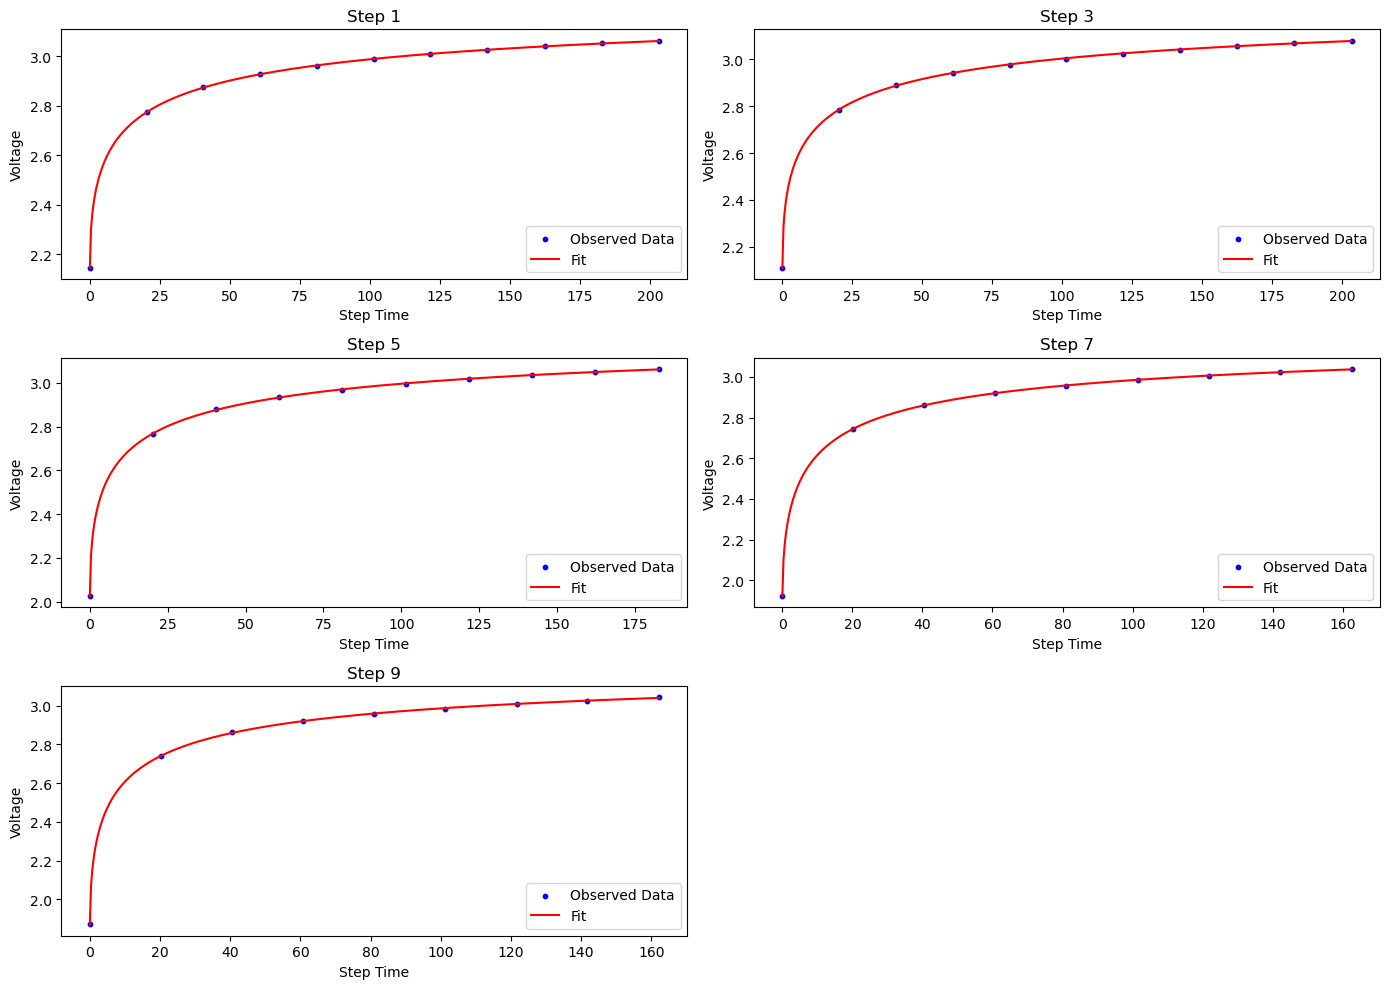

In [222]:
# Plot the observed data and fitted function for each unique step
unique_steps = [1, 3, 5, 7, 9]

num_steps = len(unique_steps)

# Set up a grid of subplots
fig, axes = plt.subplots(nrows=num_steps // 2 + num_steps % 2, ncols=2, figsize=(14, num_steps * 2))
axes = axes.flatten()  # Flatten in case the grid has extra dimensions

for idx, step in enumerate(unique_steps):
    ax = axes[idx]
    step_data = df_7[df_7['Step'] == step].sort_values(by='Step_Time')
    x = step_data['Step_Time'].values
    y_observed = step_data['Voltage'].values
    
    # Retrieve fitted parameters for this step
    L, A, x0, b = fitted_df[fitted_df['Step'] == step][['L', 'A', 'x0', 'b']].iloc[0]

    # Generate predicted values for the fine-grained x (x_fine)
    x_fine = np.linspace(x.min(), x.max(), 500)  # Fine-grained x for a smooth curve
    y_predicted = logistic_like(x_fine, L, A, x0, b)  # Use x_fine for prediction

    # Plot observed data and fitted curve
    ax.scatter(x, y_observed, color='blue', label='Observed Data', s=10)
    ax.plot(x_fine, y_predicted, color='red', label='Fit')  # Now both x_fine and y_predicted are 500 in length
    ax.set_title(f'Step {step}')
    ax.set_xlabel('Step Time')
    ax.set_ylabel('Voltage')
    ax.legend()

# Remove extra axes if any
for ax in axes[len(unique_steps):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [223]:
# Perform a left join on 'Step' column
df_log = pd.merge(df_7, fitted_df, how='left', on='Step')
df_log.head()

Chemistry  Cell  Cycle  Step Cycle_Type       Time  Voltage  \
0        NaN   7.0    0.0   1.0  discharge  11084.952    2.145   
1        NaN   7.0    0.0   1.0  discharge  11105.202    2.772   
2        NaN   7.0    0.0   1.0  discharge  11125.436    2.875   
3        NaN   7.0    0.0   1.0  discharge  11145.655    2.927   
4        NaN   7.0    0.0   1.0  discharge  11165.936    2.961   

   Reference Capacity  Instantaneous Capacity  Charge_Capacity  ...  \
0            6887.679               -6887.714              NaN  ...   
1            6887.679               -6907.871              NaN  ...   
2            6887.679               -6907.880              NaN  ...   
3            6887.679               -6907.875              NaN  ...   
4            6887.679               -6907.912              NaN  ...   

   Ambient_Temperature  Current  Charge_Type  Step_Time         L        A  \
0                 24.0   -1.989   Continuous      0.000  3.281596  1.13661   
1                 24.0   -0.002   Continuous     20.250  3.281596  1.13661   
2                 24.0    0.000   Continuous     40.484  3.281596  1.13661   
3                 24.0   -0.001   Continuous     60.703  3.281596  1.13661   
4                 24.0   -0.004   Continuous     80.984  3.281596  1.13661   

          x0         b       MSE        R2  
0  13.537962  0.525163  0.000001  0.999979  
1  13.537962  0.525163  0.000001  0.999979  
2  13.537962  0.525163  0.000001  0.999979  
3  13.537962  0.525163  0.000001  0.999979  
4  13.537962  0.525163  0.000001  0.999979  

[5 rows x 22 columns]

In [224]:
df_log[df_log['Step'] == 219].head()

Chemistry  Cell  Cycle   Step Cycle_Type        Time  Voltage  \
208        NaN   7.0  109.0  219.0  discharge  916122.968    2.188   
209        NaN   7.0  109.0  219.0  discharge  916132.749    2.834   
210        NaN   7.0  109.0  219.0  discharge  916142.530    2.944   
211        NaN   7.0  109.0  219.0  discharge  916152.296    3.011   
212        NaN   7.0  109.0  219.0  discharge  916162.108    3.064   

     Reference Capacity  Instantaneous Capacity  Charge_Capacity  ...  \
208            6154.509               -6154.510              NaN  ...   
209            6154.509               -6164.234              NaN  ...   
210            6154.509               -6164.233              NaN  ...   
211            6154.509               -6164.252              NaN  ...   
212            6154.509               -6164.271              NaN  ...   

     Ambient_Temperature  Current  Charge_Type  Step_Time   L   A  x0   b  \
208                 24.0   -1.991   Continuous      0.000 NaN NaN NaN NaN   
209                 24.0    0.002   Continuous      9.781 NaN NaN NaN NaN   
210                 24.0   -0.003   Continuous     19.562 NaN NaN NaN NaN   
211                 24.0   -0.002   Continuous     29.328 NaN NaN NaN NaN   
212                 24.0   -0.003   Continuous     39.140 NaN NaN NaN NaN   

     MSE  R2  
208  NaN NaN  
209  NaN NaN  
210  NaN NaN  
211  NaN NaN  
212  NaN NaN  

[5 rows x 22 columns]

In [225]:
df_log = df_log[~df_log['Step'].isin([219, 223, 227, 231, 235, 239, 312, 315])]

In [228]:
df_log['Max_Temp'] = df_log.groupby(['Step'])['Temperature'].transform('max')

In [229]:
# Get unique Step and Rebound pairs
per_step = df_log[['Step', 'L', 'A', 'x0', 'b', 'Reference Capacity', 'Max_Temp', 'Ambient_Temperature']].drop_duplicates()
per_step.shape

(131, 8)

In [230]:
per_step.to_csv('C:/Users/Worm/Downloads/New_NASA_Rebound/nasa7_NEW.csv', index = False)

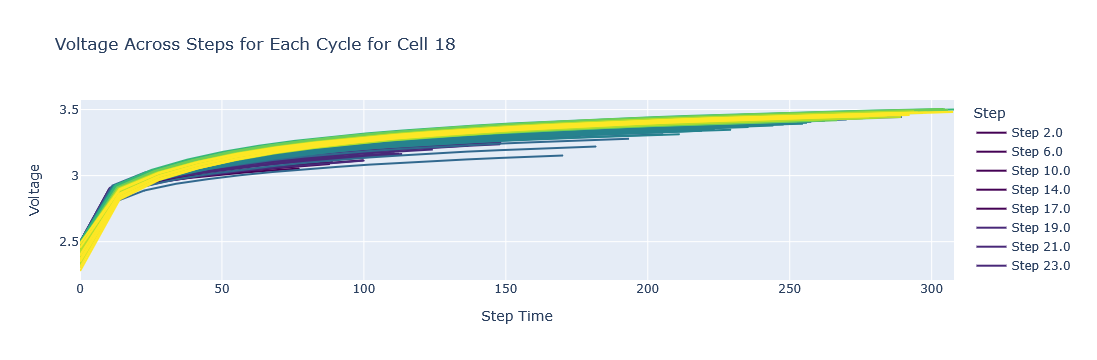

In [231]:
# 18
# Normalize the step to a range from 0 to 1 for color selection
steps = nasa[nasa['Cell'] == 18]['Step'].unique()
max_step = max(steps)

# Create a figure
fig = go.Figure()

# Add a line trace for each unique step
for step in steps:
    step_data = nasa[(nasa['Cell'] == 18) & (nasa['Step'] == step)]
    
    # Select a color from the Viridis color scale based on the normalized step value
    color = px.colors.sequential.Viridis[round((step / max_step) * (len(px.colors.sequential.Viridis) - 1))]
    
    fig.add_trace(
        go.Scatter(
            x=step_data['Step_Time'],
            y=step_data['Voltage'],
            mode='lines',
            name=f'Step {step}',
            line=dict(color=color),
            hoverinfo="text+name",
        )
    )

# Customize layout
fig.update_layout(
    title="Voltage Across Steps for Each Cycle for Cell 18",
    xaxis_title="Step Time",
    yaxis_title="Voltage",
    legend_title="Step"
)

# Show the plot
fig.show()

In [232]:
df_18 = nasa[nasa['Cell'] == 18]
df_18['Step'].nunique()

132

In [233]:
def logistic_like(x, L, A, x0, b):
    """
    Logistic-like function with four parameters.
    L: Asymptotic maximum value
    A: Scaling factor
    x0: Midpoint of the curve
    b: Growth rate
    """
    return L - A / (1 + (x / x0)**b)

# Dataframe to store fitted parameters
fitted_parameters = []

# Iterate over each unique step
for step in df_18['Step'].unique():
    step_data = df_18[df_18['Step'] == step].sort_values(by='Step_Time')
    x = step_data['Step_Time'].values
    y = step_data['Voltage'].values

    # Initial guesses and bounds
    initial_guesses = [max(y), max(y) - min(y), np.median(x), 2]  # Guesses for [L, A, x0, b]
    lower_bounds = [0, 0, 0, 0]  # Set reasonable lower bounds
    upper_bounds = [np.inf, np.inf, np.inf, np.inf]  # Set reasonable upper bounds

    # Fit the curve
    try:
        params, _ = curve_fit(
            logistic_like, x, y,
            p0=initial_guesses,
            bounds=(lower_bounds, upper_bounds)
        )
        # Append the parameters with the step number
        fitted_parameters.append((step, params[0], params[1], params[2], params[3]))

    except RuntimeError:
        print(f"Fit could not be found for Step {step}")

# Convert fitted parameters to a DataFrame
fitted_df = pd.DataFrame(fitted_parameters, columns=['Step', 'L', 'A', 'x0', 'b'])
print(fitted_df)

Fit could not be found for Step 2.0
      Step         L         A           x0         b
0      6.0  4.472007  2.061015  1174.085961  0.276892
1     10.0  4.137918  1.743924   347.136622  0.299443
2     14.0  4.479907  2.080916   984.664674  0.280869
3     17.0  4.540810  2.155823  1043.389567  0.284511
4     19.0  4.412614  2.041632   673.155083  0.295025
..     ...       ...       ...          ...       ...
126  308.0  3.814522  1.467215    44.071534  0.605898
127  310.0  3.796900  1.308600    49.083561  0.633399
128  313.0  3.805727  1.406354    44.609692  0.626247
129  316.0  3.826454  1.548152    40.065654  0.601054
130  318.0  3.809177  1.443851    42.089512  0.623447

[131 rows x 5 columns]


In [234]:
# Lists to store MSE and R^2 values
mse_list = []
r2_list = []

# Iterate over each fitted step and calculate MSE and R²
for step, L, A, x0, b in fitted_df[['Step', 'L', 'A', 'x0', 'b']].values:
    step_data = df_18[df_18['Step'] == step].sort_values(by='Step_Time')
    x = step_data['Step_Time'].values
    y_observed = step_data['Voltage'].values

    # Use the logistic-like function for prediction (L - A / (1 + (x / x0) ** b))
    y_predicted = logistic_like(x, L, A, x0, b)

    # Calculate R² score
    r2 = r2_score(y_observed, y_predicted)
    r2_list.append(r2)
    
    # Calculate MSE
    mse = np.mean((y_observed - y_predicted) ** 2)
    mse_list.append(mse)

# Add MSE and R² to the fitted_df DataFrame
fitted_df['MSE'] = mse_list
overall_mse = np.mean(mse_list)

fitted_df['R2'] = r2_list
average_r2 = np.mean(r2_list)

# Print the overall MSE and average R²
print(f"Overall MSE across all steps: {overall_mse:.4f}")
print(f"Average R² across all steps: {average_r2:.4f}")

Overall MSE across all steps: 0.0000
Average R² across all steps: 0.9999


In [235]:
fitted_df.head()

Step         L         A           x0         b           MSE        R2
0   6.0  4.472007  2.061015  1174.085961  0.276892  7.519777e-07  0.999979
1  10.0  4.137918  1.743924   347.136622  0.299443  7.635671e-07  0.999981
2  14.0  4.479907  2.080916   984.664674  0.280869  1.256826e-06  0.999968
3  17.0  4.540810  2.155823  1043.389567  0.284511  1.286176e-06  0.999967
4  19.0  4.412614  2.041632   673.155083  0.295025  1.958000e-06  0.999952

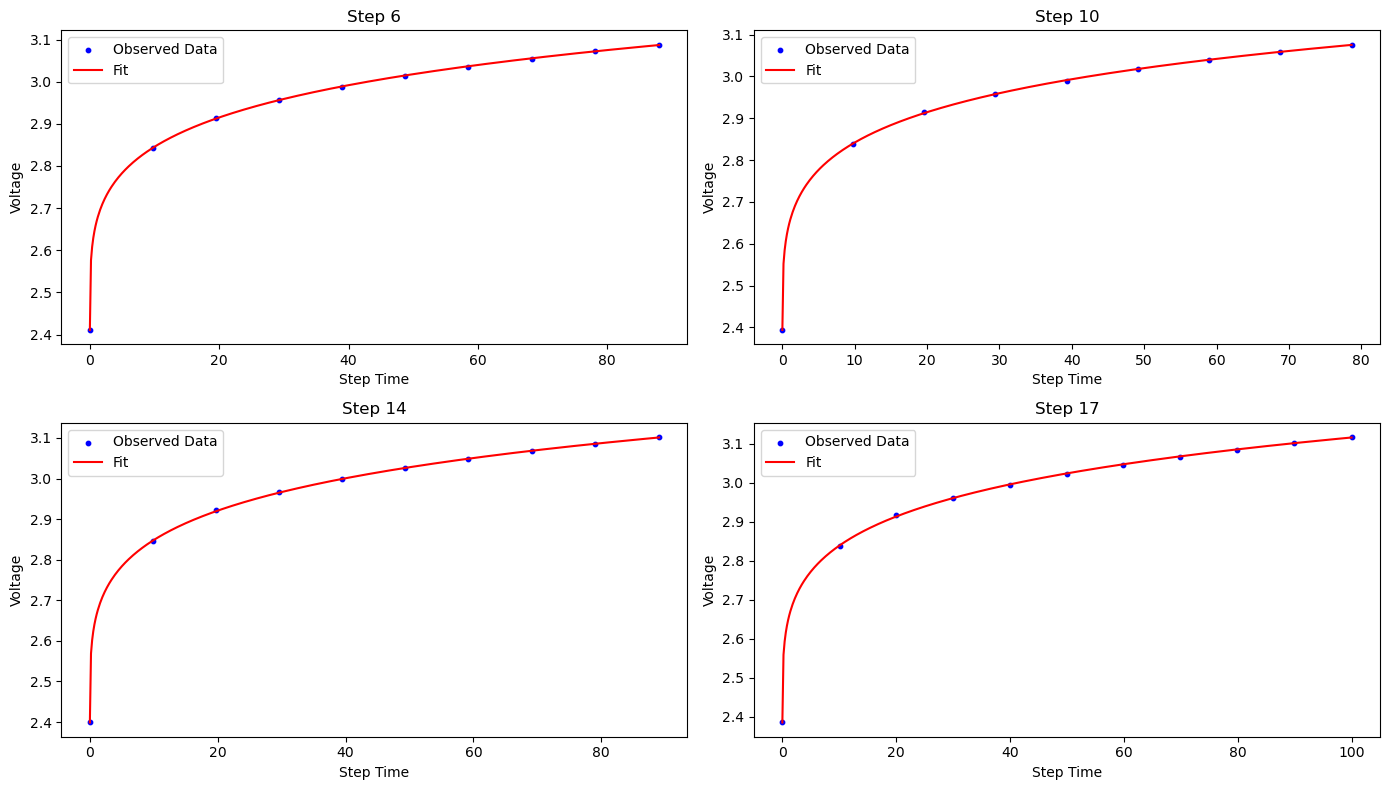

In [236]:
# Plot the observed data and fitted function for each unique step
unique_steps = [6, 10, 14, 17]

num_steps = len(unique_steps)

# Set up a grid of subplots
fig, axes = plt.subplots(nrows=num_steps // 2 + num_steps % 2, ncols=2, figsize=(14, num_steps * 2))
axes = axes.flatten()  # Flatten in case the grid has extra dimensions

for idx, step in enumerate(unique_steps):
    ax = axes[idx]
    step_data = df_18[df_18['Step'] == step].sort_values(by='Step_Time')
    x = step_data['Step_Time'].values
    y_observed = step_data['Voltage'].values
    
    # Retrieve fitted parameters for this step
    L, A, x0, b = fitted_df[fitted_df['Step'] == step][['L', 'A', 'x0', 'b']].iloc[0]

    # Generate predicted values for the fine-grained x (x_fine)
    x_fine = np.linspace(x.min(), x.max(), 500)  # Fine-grained x for a smooth curve
    y_predicted = logistic_like(x_fine, L, A, x0, b)  # Use x_fine for prediction

    # Plot observed data and fitted curve
    ax.scatter(x, y_observed, color='blue', label='Observed Data', s=10)
    ax.plot(x_fine, y_predicted, color='red', label='Fit')  # Now both x_fine and y_predicted are 500 in length
    ax.set_title(f'Step {step}')
    ax.set_xlabel('Step Time')
    ax.set_ylabel('Voltage')
    ax.legend()

# Remove extra axes if any
for ax in axes[len(unique_steps):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [237]:
# Perform a left join on 'Step' column
df_log = pd.merge(df_18, fitted_df, how='left', on='Step')
df_log.head()

Chemistry  Cell  Cycle  Step Cycle_Type       Time  Voltage  \
0        NaN  18.0    1.0   2.0  discharge  11480.374    2.472   
1        NaN  18.0    1.0   2.0  discharge  11489.984    2.861   
2        NaN  18.0    1.0   2.0  discharge  11499.671    2.919   
3        NaN  18.0    1.0   2.0  discharge  11509.406    2.955   
4        NaN  18.0    1.0   2.0  discharge  11519.046    2.982   

   Reference Capacity  Instantaneous Capacity  Charge_Capacity  ...  \
0            6716.387               -6716.381              NaN  ...   
1            6716.387               -6726.029              NaN  ...   
2            6716.387               -6726.019              NaN  ...   
3            6716.387               -6726.012              NaN  ...   
4            6716.387               -6726.003              NaN  ...   

   Ambient_Temperature  Current  Charge_Type  Step_Time   L   A  x0   b  MSE  \
0                 24.0   -2.010   Continuous      0.000 NaN NaN NaN NaN  NaN   
1                 24.0    0.001   Continuous      9.610 NaN NaN NaN NaN  NaN   
2                 24.0    0.000   Continuous     19.297 NaN NaN NaN NaN  NaN   
3                 24.0    0.000   Continuous     29.032 NaN NaN NaN NaN  NaN   
4                 24.0    0.000   Continuous     38.672 NaN NaN NaN NaN  NaN   

   R2  
0 NaN  
1 NaN  
2 NaN  
3 NaN  
4 NaN  

[5 rows x 22 columns]

In [238]:
df_log[df_log['Step'] == 2].head()

Chemistry  Cell  Cycle  Step Cycle_Type       Time  Voltage  \
0        NaN  18.0    1.0   2.0  discharge  11480.374    2.472   
1        NaN  18.0    1.0   2.0  discharge  11489.984    2.861   
2        NaN  18.0    1.0   2.0  discharge  11499.671    2.919   
3        NaN  18.0    1.0   2.0  discharge  11509.406    2.955   
4        NaN  18.0    1.0   2.0  discharge  11519.046    2.982   

   Reference Capacity  Instantaneous Capacity  Charge_Capacity  ...  \
0            6716.387               -6716.381              NaN  ...   
1            6716.387               -6726.029              NaN  ...   
2            6716.387               -6726.019              NaN  ...   
3            6716.387               -6726.012              NaN  ...   
4            6716.387               -6726.003              NaN  ...   

   Ambient_Temperature  Current  Charge_Type  Step_Time   L   A  x0   b  MSE  \
0                 24.0   -2.010   Continuous      0.000 NaN NaN NaN NaN  NaN   
1                 24.0    0.001   Continuous      9.610 NaN NaN NaN NaN  NaN   
2                 24.0    0.000   Continuous     19.297 NaN NaN NaN NaN  NaN   
3                 24.0    0.000   Continuous     29.032 NaN NaN NaN NaN  NaN   
4                 24.0    0.000   Continuous     38.672 NaN NaN NaN NaN  NaN   

   R2  
0 NaN  
1 NaN  
2 NaN  
3 NaN  
4 NaN  

[5 rows x 22 columns]

In [239]:
df_log = df_log[df_log['Step'] != 2]

In [241]:
df_log.head()

Chemistry  Cell  Cycle  Step Cycle_Type       Time  Voltage  \
9         NaN  18.0    3.0   6.0  discharge  25699.969    2.411   
10        NaN  18.0    3.0   6.0  discharge  25709.688    2.842   
11        NaN  18.0    3.0   6.0  discharge  25719.438    2.914   
12        NaN  18.0    3.0   6.0  discharge  25729.203    2.957   
13        NaN  18.0    3.0   6.0  discharge  25738.953    2.988   

    Reference Capacity  Instantaneous Capacity  Charge_Capacity  ...  \
9             6673.933               -6673.923              NaN  ...   
10            6673.933               -6683.706              NaN  ...   
11            6673.933               -6683.729              NaN  ...   
12            6673.933               -6683.760              NaN  ...   
13            6673.933               -6683.782              NaN  ...   

    Ambient_Temperature  Current  Charge_Type  Step_Time         L         A  \
9                  24.0   -2.013   Continuous      0.000  4.472007  2.061015   
10                 24.0   -0.002   Continuous      9.719  4.472007  2.061015   
11                 24.0   -0.004   Continuous     19.469  4.472007  2.061015   
12                 24.0   -0.003   Continuous     29.234  4.472007  2.061015   
13                 24.0   -0.002   Continuous     38.984  4.472007  2.061015   

             x0         b           MSE        R2  
9   1174.085961  0.276892  7.519777e-07  0.999979  
10  1174.085961  0.276892  7.519777e-07  0.999979  
11  1174.085961  0.276892  7.519777e-07  0.999979  
12  1174.085961  0.276892  7.519777e-07  0.999979  
13  1174.085961  0.276892  7.519777e-07  0.999979  

[5 rows x 22 columns]

In [242]:
df_log['Max_Temp'] = df_log.groupby(['Step'])['Temperature'].transform('max')

In [243]:
# Get unique Step and Rebound pairs
per_step = df_log[['Step', 'L', 'A', 'x0', 'b', 'Reference Capacity', 'Max_Temp', 'Ambient_Temperature']].drop_duplicates()
per_step.shape

(131, 8)

In [244]:
per_step.to_csv('C:/Users/Worm/Downloads/New_NASA_Rebound/nasa18_NEW.csv', index = False)